**OBLIGATORIO FINAL G448 - Data Wrangling**
<br>**INTEGRANTES:**
<br>
+ Theo Pereira, 5703834-3, theopereira2001@gmail.com
+ Carlos Píriz, 4298784-4, piriz.carlos@gmail.com
+ Gabriel	Better,3138871-2, gabrielbetter@gmail.com

In [44]:
### Importacion de librerias ###

# Sistema
import os

# Tratamiento de datos
import pandas as pd
import numpy as np
import datetime as dt
import math

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import re

# Visualizacion 
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency
import matplotlib.pyplot as plt
%matplotlib inline

**CONSIGNAS**
<br>
El objetivo general es realizar un análisis exploratorio de los anuncios inmobiliarios de
algunas provincias de la Patagonia Argentina reportados por el portal Airbnb.
<br>
Los datos están conformados por cuatro archivos csv:
+ Neuquen.csv
+ Rio_Negro.csv
+ Chubut.csv
+ Tierra_del_Fuego.csv

**<h1>1. Carga de datos y armado del dataset</h1>**

In [45]:
# Carga de archivos de datos de chubut
df_chubut = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Chubut.csv')
df_chubut["provincia"]="CHUBUT"
df_chubut.sample(3)

id_alojamiento                                               name  \
241            31316316  Habitación privada, vista al jardín de crasulá...   
118  887853891920643116                     Luma, tu lugar feliz en el sur   
22             38289617                                    Casa San Benito   

         category    rating           city   latitude  longitude  \
241  private_room   5,0 (5)  Puerto Madryn -42.782190 -65.024070   
118   entire_home     Nuevo         Esquel -42.917491 -71.294685   
22    entire_home  5,0 (34)         Trelew -43.274440 -65.281140   

                                       characteristics    check_in  \
241  ['2 camas', '1 dormitorio', '2 camas de una pl...  2023-07-01   
118               ['1 cama', '1 dormitorio', '1 baño']  2023-07-01   
22   ['2 camas', '1 dormitorio', '1 baño', 'Calific...  2023-07-01   

      check_out price_discounted price_original price_qualifier  \
241  2023-07-06              NaN        $22 USD           noche   
118  2023-07-06          $34 USD        $42 USD           noche   
22   2023-07-06              NaN        $39 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna provincia  
241             1000      2023-06-24       2023-05-01  239.919355    CHUBUT  
118             1000      2023-06-24       2023-05-01  239.919355    CHUBUT  
22              1000      2023-06-24       2023-05-01  239.919355    CHUBUT

In [46]:
# Carga de archivos de datos de Neuquen
df_neuquen = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Neuquen.csv')
df_neuquen["provincia"] = "NEUQUEN"
df_neuquen.sample(3)

id_alojamiento                            name     category rating  \
180  826077606681970295                  Don Bosco 1ero  entire_home    NaN   
170  792160959784973499   Hermoso departamento centrico  entire_home    NaN   
120  884876933592191166  departamento para 4/5 personas  entire_home  Nuevo   

        city  latitude  longitude  \
180  Neuquén -38.96627  -68.06603   
170  Neuquén -38.95061  -68.05973   
120  Neuquén -38.95304  -68.07882   

                                       characteristics    check_in  \
180  ['2 camas', '1 dormitorio', '1 baño', 'Estacio...  2023-07-01   
170       ['1 cama', '1 dormitorio', '1 baño', 'Wifi']  2023-07-01   
120    ['4 camas', '2 dormitorios', '2 baños', 'Wifi']  2023-07-01   

      check_out price_discounted price_original price_qualifier  \
180  2023-07-06              NaN        $59 USD           noche   
170  2023-07-06              NaN        $40 USD           noche   
120  2023-07-06              NaN        $79 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna provincia  
180              298      2023-06-24       2023-05-01  239.919355   NEUQUEN  
170              298      2023-06-24       2023-05-01  239.919355   NEUQUEN  
120              298      2023-06-24       2023-05-01  239.919355   NEUQUEN

In [47]:
# Carga de archivos de datos de Rio Negro
df_rio_negro = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Rio_Negro.csv')
df_rio_negro["provincia"] = "RIO NEGRO"
df_rio_negro.sample(3)

id_alojamiento                                               name  \
121            33512769                     Las Liebres Doble - D.T. 48/19   
176  782060930905714812                   Cabaña en la montaña: La Cascada   
65             53591290  Cabaña Nórdica , vista increíble al Lago y Cerros   

        category     rating                     city  latitude  longitude  \
121  entire_home  4,92 (90)  San Carlos de Bariloche -41.12717  -71.35206   
176  entire_home        NaN  San Martin de los Andes -40.14405  -71.27512   
65   entire_home  4,79 (42)  San Carlos de Bariloche -41.16919  -71.37223   

                                       characteristics    check_in  \
121  ['1 cama', '1 dormitorio', '1 baño', 'Estacion...  2023-09-26   
176  ['1 cama', '1 dormitorio', '1 baño', 'Estacion...  2023-07-01   
65   ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   

      check_out price_discounted price_original price_qualifier  \
121  2023-10-01              NaN        $50 USD           noche   
176  2023-07-06          $45 USD        $75 USD           noche   
65   2023-07-06          $83 USD       $120 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  provincia  
121             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO  
176             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO  
65              1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO

In [48]:
# Carga de archivos de datos de Tierra delFuego
df_tierra_del_fuego = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Tierra_del_Fuego.csv')
df_tierra_del_fuego["provincia"] = "TIERRA DEL FUEGO"
df_tierra_del_fuego.sample(3)

id_alojamiento                                               name  \
71   755135392594127489  Encantadoras vistas del canal de beagle - Amun...   
110            27197171  Apartamento en la Torre Ushuaia con VISTAS ÚNI...   
163  592219276422459264                                 El Dpto. de Morita   

        category      rating     city  latitude  longitude  \
71   entire_home    5,0 (19)  Ushuaia -54.81010  -68.31941   
110  entire_home  4,88 (175)  Ushuaia -54.80534  -68.30122   
163  entire_home   4,94 (33)  Ushuaia -54.79906  -68.28598   

                                       characteristics    check_in  \
71   ['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...  2023-07-01   
110  ['5 camas', '3 dormitorios', '2 baños', '1 cam...  2023-09-24   
163  ['3 camas', '2 dormitorios', '1 baño', '1 cama...  2023-07-20   

      check_out price_discounted price_original price_qualifier  \
71   2023-07-06              NaN        $85 USD           noche   
110  2023-09-29              NaN        $80 USD           noche   
163  2023-07-27          $30 USD        $33 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
71              1000      2023-06-24       2023-05-01  239.919355   
110             1000      2023-06-24       2023-05-01  239.919355   
163             1000      2023-06-24       2023-05-01  239.919355   

            provincia  
71   TIERRA DEL FUEGO  
110  TIERRA DEL FUEGO  
163  TIERRA DEL FUEGO

In [49]:
# Verificacion de columnas para concatenar
(df_chubut.columns == df_neuquen.columns) & (df_rio_negro.columns == df_tierra_del_fuego.columns) & (df_chubut.columns == df_tierra_del_fuego.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [50]:
# Concatenacion de los dataframes separados por provincias en un unico archivo
df_alquileres = pd.concat([df_chubut, df_neuquen, df_rio_negro, df_tierra_del_fuego])
df_alquileres.sample(5)

id_alojamiento                                    name     category  \
166  734877502966665498                             Casa Bosque  entire_home   
130            54258723     NEW APARTMENT - LAS CUMBRES USHUAIA  entire_home   
5              42407010  Luminoso Centro + Cochera (50mts RN22)  entire_home   
132  900589438839775479                        La Casa de Delia  entire_home   
175  881239031409741069             Paraiso único frente el mar  entire_home   

        rating                     city   latitude  longitude  \
166        NaN  San Martín de los Andes -40.122360 -71.290410   
130        NaN                  Ushuaia -54.818920 -68.332450   
5    4,56 (94)                      BVH -38.959240 -68.051260   
132      Nuevo                   Esquel -42.913289 -71.325990   
175      Nuevo            Playa Magagna -43.385146 -65.045125   

                                       characteristics    check_in  \
166  ['3 camas', '2 dormitorios', '2 baños', '1 cam...  2023-07-01   
130  ['1 cama', '1 dormitorio', '1 baño', '1 cama q...  2023-07-17   
5    ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   
132             ['5 camas', '2 dormitorios', '1 baño']  2023-07-01   
175              ['4 camas', '1 dormitorio', '1 baño']  2023-07-01   

      check_out price_discounted price_original price_qualifier  \
166  2023-07-06              NaN       $110 USD           noche   
130  2023-07-23          $35 USD        $50 USD           noche   
5    2023-07-07              NaN        $23 USD           noche   
132  2023-07-06          $58 USD        $72 USD           noche   
175  2023-07-06          $79 USD        $99 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
166             1000      2023-06-24       2023-05-01  239.919355   
130             1000      2023-06-24       2023-05-01  239.919355   
5                298      2023-06-24       2023-05-01  239.919355   
132             1000      2023-06-24       2023-05-01  239.919355   
175             1000      2023-06-24       2023-05-01  239.919355   

            provincia  
166         RIO NEGRO  
130  TIERRA DEL FUEGO  
5             NEUQUEN  
132            CHUBUT  
175            CHUBUT

In [51]:
# Reseteo del index, permitiendo duplicados porque aun no sabemos si son unicos los valores
# df_alquileres.reset_index(names = 'id_alojamiento', drop=True,inplace=True,allow_duplicates= True)
# df_alquileres.reset_index(names = 'id_alojamiento', drop=True,inplace=True,allow_duplicates= False)
# df_alquileres.reset_index(drop=True,inplace=True)
df_alquileres.reset_index(drop=True, inplace= True)
df_alquileres.head()

id_alojamiento                                               name  \
0  855050336912355203                                        North Beach   
1            51484364     Hermoso Monoambiente con Vista al Mar y Pileta   
2  800749301724167838                           Departamento Bella Vista   
3            50769917  New Lil’ & Cozy - 100mts de la playa Puerto Ma...   
4  916738743930751566                                        Front Beach   

      category     rating           city   latitude  longitude  \
0  entire_home        NaN  Puerto Madryn -42.756301 -65.037517   
1  entire_home        NaN  Puerto Madryn -42.755775 -65.037265   
2  entire_home    5,0 (6)  Puerto Madryn -42.768007 -65.033108   
3  entire_home  4,91 (70)  Puerto Madryn -42.777590 -65.025890   
4  entire_home      Nuevo  Puerto Madryn -42.770540 -65.030810   

                                     characteristics    check_in   check_out  \
0              ['2 camas', '1 dormitorio', '1 baño']  2023-07-06  2023-07-12   
1  ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-21  2023-07-26   
2  ['3 camas', '1 dormitorio', '1 baño', 'Calific...  2023-08-01  2023-08-08   
3  ['1 cama', '1 dormitorio', '1 baño', '1 cama q...  2023-07-09  2023-07-14   
4              ['2 camas', 'Monoambiente', '1 baño']  2023-07-01  2023-07-06   

  price_discounted price_original price_qualifier  cant_resultados  \
0              NaN        $38 USD           noche             1000   
1          $18 USD        $24 USD           noche             1000   
2              NaN        $43 USD           noche             1000   
3              NaN        $41 USD           noche             1000   
4              NaN        $35 USD           noche             1000   

  fecha_scrapping fecha_cambio_bna  cambio_bna provincia  
0      2023-06-24       2023-05-01  239.919355    CHUBUT  
1      2023-06-24       2023-05-01  239.919355    CHUBUT  
2      2023-06-24       2023-05-01  239.919355    CHUBUT  
3      2023-06-24       2023-05-01  239.919355    CHUBUT  
4      2023-06-24       2023-05-01  239.919355    CHUBUT

*Verificacion de filas de los dataframes*

In [52]:
# Verificacion de la cantidad de filas de cada dataframe
print("La cantidad de filas del dataframe de Chubut es:"+str(df_chubut.shape[0]))
print("La cantidad de filas del dataframe de Neuquen es:"+str(df_neuquen.shape[0]))
print("La cantidad de filas del dataframe de Rio Negro es:"+str(df_rio_negro.shape[0]))
print("La cantidad de filas del dataframe de Tierra del fuego es:" + str(df_tierra_del_fuego.shape[0]))
print("La cantidad de filas del dataframe unificado de alquileres es:" + str(df_alquileres.shape[0]))


La cantidad de filas del dataframe de Chubut es:270
La cantidad de filas del dataframe de Neuquen es:270
La cantidad de filas del dataframe de Rio Negro es:270
La cantidad de filas del dataframe de Tierra del fuego es:270
La cantidad de filas del dataframe unificado de alquileres es:1080


*Verificacion de las columnas de los dataframes*

In [53]:
# Verificacion de la cantidad de columnas de cada dataframe
print("La cantidad de columnas del dataframe de Chubut es:" +
      str(df_chubut.shape[1]))
print("La cantidad de columnas del dataframe de Neuquen es:" +
      str(df_neuquen.shape[1]))
print("La cantidad de columnas del dataframe de Rio Negro es:" +
      str(df_rio_negro.shape[1]))
print("La cantidad de columnas del dataframe de Tierra del fuego es:" +
      str(df_tierra_del_fuego.shape[1]))
print("La cantidad de columnas del dataframe unificado de alquileres es:" +
      str(df_alquileres.shape[1]))

La cantidad de columnas del dataframe de Chubut es:18
La cantidad de columnas del dataframe de Neuquen es:18
La cantidad de columnas del dataframe de Rio Negro es:18
La cantidad de columnas del dataframe de Tierra del fuego es:18
La cantidad de columnas del dataframe unificado de alquileres es:18


*Verificacion general e inicial del dataframe unificado*

In [54]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1080 non-null   int64  
 1   name              1080 non-null   object 
 2   category          1080 non-null   object 
 3   rating            886 non-null    object 
 4   city              1076 non-null   object 
 5   latitude          1080 non-null   float64
 6   longitude         1080 non-null   float64
 7   characteristics   1080 non-null   object 
 8   check_in          1080 non-null   object 
 9   check_out         1080 non-null   object 
 10  price_discounted  201 non-null    object 
 11  price_original    1080 non-null   object 
 12  price_qualifier   1080 non-null   object 
 13  cant_resultados   1080 non-null   int64  
 14  fecha_scrapping   1080 non-null   object 
 15  fecha_cambio_bna  1080 non-null   object 
 16  cambio_bna        1080 non-null   float64


In [55]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.describe()

id_alojamiento     latitude    longitude  cant_resultados   cambio_bna
count    1.080000e+03  1080.000000  1080.000000      1080.000000  1080.000000
mean     3.685341e+17   -44.426201   -68.723924       824.500000   239.919355
std      3.903051e+17     6.164758     2.159715       304.115744     0.000000
min      4.468310e+05   -54.844914   -71.688000       298.000000   239.919355
25%      3.529220e+07   -47.854503   -71.310280       824.500000   239.919355
50%      5.408344e+07   -42.003780   -68.305610      1000.000000   239.919355
75%      7.872495e+17   -39.609811   -68.049328      1000.000000   239.919355
max      9.198428e+17   -38.874370   -62.920960      1000.000000   239.919355

In [56]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.duplicated(keep="first").sum()

51

In [57]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.isna().sum()

id_alojamiento        0
name                  0
category              0
rating              194
city                  4
latitude              0
longitude             0
characteristics       0
check_in              0
check_out             0
price_discounted    879
price_original        0
price_qualifier       0
cant_resultados       0
fecha_scrapping       0
fecha_cambio_bna      0
cambio_bna            0
provincia             0
dtype: int64

*Conclusiones iniciales*
<br>
+ El dataframe unificado, coincide en cantidad de filas y columnas correspondientes a los dataframes individuales
+ Debemos de corregir algunos tipos de datos de columnas
+ Tenemos algunas columnas para reescalar
+ Tenemos filas duplicadas para revisar
+ Tenemos valores nulos para revisar, en principio para las columnas rating y price_discounted

**<h1>2. Análisis de duplicados</h1>**

*Analisis y tratamiento de duplicados global*

In [58]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres.duplicated(keep="first").sum()

51

In [59]:
#  Listo los valores duplicados
df_alquileres[df_alquileres.duplicated(keep="first")]

id_alojamiento                                               name  \
54              40755147  La Amarilla Casa de Huéspedes (con cocina) Rut...   
72    586216477715336949  Encantador dpto. con vista al mar en Puerto Ma...   
90              37836757                                     Rincón del Sol   
113   736253141994173324           Refugio Ciprés con tina de agua caliente   
127             21925703      Hermoso Duplex con Patio y Parrilla. (4 pax).   
128   644043911246503372     Los Molles, casa familiar  en entorno natural.   
129   883174783781736766                             Espacio 2 - Rada Tilly   
138             53298317                       Mar de Olivillos Planta alta   
162             31081731                 Domos Puelo, para dos, con jacuzzi   
182             50704005   Hostel patagónico con vista 360 de la Cordillera   
189   800916516894617209  Cómodas Habitaciones, 50 m del Mar con Desayun...   
216             53336620               Comodo Monoambiente en puerto madryn   
221             54362650     "Ty Bychan" \nLa Casita. Entre raíces galesas.   
234   807474929736554545                          Cabaña de Playa. Bajada 7   
247             41936762                                       El Tornado B   
253   909336244153347770                                      Bella Vista 2   
255   803666373797660065                      Casa nueva equipada con patio   
265   914317237704080953                    Dep,AlquilerTemporario,Acogedor   
630             25286446                                    Casita Hillside   
720              4635954  ESTUDIO A 20 METROS DEL CIVICO CENTER, VISTA A...   
756             38777312                                  Cabañas Waldesruh   
757             37245663  Preciosa cabaña en el bosque de Llaollao con v...   
828   604911298357239989                        IBF SKY - Ushuaia Apartment   
832   711705563371014313                 C) Cama en cuarto mixto compartido   
846             39446425                  Cozy Flat, with incredible views.   
850             54314756                       Infinity View Pent House III   
852   604911298357239989                        IBF SKY - Ushuaia Apartment   
882   710167445018555343        Apartamento Amundsen 6J - Estudio - Ushuaia   
885             40366875                 H) Cama en cuarto mixto compartido   
893   755135392594127489  Encantadoras vistas del canal de beagle - Amun...   
922             38919535       Moderno y luminoso estudio en  pleno centro.   
943   570310791164532435                              Casa barrio de sueños   
954              2942774        Room with incredible sea and mountains view   
971             24852036                                 Mi Casa Es Su Casa   
989             53797805            Humilde hogar, en el corazón de Ushuaia   
993             48043650                                Latitud Sur Ushuaia   
1001  776661041221694371                   Lindo estudio céntrico y moderno   
1008  751515304138637905          Agradable cabaña con amplias dimensiones.   
1009  837061192294336671                             Loft del Fin del Mundo   
1010  847640105410806361                                          Mini casa   
1011            54301035  Departamento de 2 ambientes -vista al Canal Be...   
1017  831611894265914063                                       Ushuaia home   
1018            54258723                NEW APARTMENT - LAS CUMBRES USHUAIA   
1032            53445794      Departamento con excelente ubicación y vistas   
1046  626675407573680894                            Precioso Departamento A   
1054  906355891628807276                                        Grand House   
1060  858196681965117698                           La Tempranera del Beagle   
1062  562143078127144674                                           Turquesa   
1063            51759643     Departamento con vista abierta  a las montañas   
1064             8048378               DESAPARTAMENTO SAN MA

In [60]:
# Elimino los duplicados, que coinciden en toda la fila
df_alquileres.drop_duplicates(keep="first", inplace=True)
df_alquileres.shape

(1029, 18)

*Analisis y tratamiento de duplicados por columna*

+ Columna 1: id_alojamiento

In [61]:
# Busco si hay duplicados
df_alquileres['id_alojamiento'].duplicated(keep='first').sum()

1

In [62]:
# Identifico filas con esos valores duplicados
df_alquileres[df_alquileres['id_alojamiento'].duplicated(keep='first')]

id_alojamiento          name     category    rating  \
648        53729814  Pequeña casa  entire_home  5,0 (36)   

                        city  latitude  longitude  \
648  San Carlos de Bariloche -41.14768  -71.31827   

                                       characteristics    check_in  \
648  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-08-18   

      check_out price_discounted price_original price_qualifier  \
648  2023-08-23              NaN        $39 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  provincia  
648             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO

In [63]:
# Muestro las filas que corresponden a los valores duplicados, todas
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

id_alojamiento          name     category    rating  \
647        53729814  Pequeña casa  entire_home  5,0 (36)   
648        53729814  Pequeña casa  entire_home  5,0 (36)   

                        city  latitude  longitude  \
647  San Carlos de Bariloche -41.14768  -71.31827   
648  San Carlos de Bariloche -41.14768  -71.31827   

                                       characteristics    check_in  \
647  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-08-18   
648  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-08-18   

      check_out price_discounted price_original price_qualifier  \
647  2023-08-23              NaN        $39 USD           noche   
648  2023-08-23              NaN        $39 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  provincia  
647             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO  
648             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO

-> Analisis de los valores de las filas duplicadas.

In [64]:
#Verificamos los valores 
df_alquileres.loc[648]

id_alojamiento                                               53729814
name                                                     Pequeña casa
category                                                  entire_home
rating                                                       5,0 (36)
city                                          San Carlos de Bariloche
latitude                                                    -41.14768
longitude                                                   -71.31827
characteristics     ['1 cama', '1 dormitorio', '1 baño', '1 cama d...
check_in                                                   2023-08-18
check_out                                                  2023-08-23
price_discounted                                                  NaN
price_original                                                $39 USD
price_qualifier                                                 noche
cant_resultados                                                  1000
fecha_scrapping     

In [65]:
# Verificamos los valores
df_alquileres.loc[648]

id_alojamiento                                               53729814
name                                                     Pequeña casa
category                                                  entire_home
rating                                                       5,0 (36)
city                                          San Carlos de Bariloche
latitude                                                    -41.14768
longitude                                                   -71.31827
characteristics     ['1 cama', '1 dormitorio', '1 baño', '1 cama d...
check_in                                                   2023-08-18
check_out                                                  2023-08-23
price_discounted                                                  NaN
price_original                                                $39 USD
price_qualifier                                                 noche
cant_resultados                                                  1000
fecha_scrapping     

In [66]:
# Verificamos los valores para la variable que tendria fiferencia
df_alquileres.loc[647]["characteristics"]

"['1 cama', '1 dormitorio', '1 baño', '1 cama doble', 'Estacionamiento gratis', 'Wifi']"

In [72]:
# Verificamos los valores para la variable que tendria fiferencia
df_alquileres.iloc[648]["characteristics"]

"['7 camas', '3 dormitorios', '2,5 baños', '1 cama doble', '4 camas de una plaza', 'más', 'Estacionamiento gratis', 'Wifi']"

*ACCION:*
<BR>
*Vemos que seria el mismo registro con excepcion de la serie characteristics, donde tiene agregada comentario de calificacion*
<br>
*Como consideramos que cada valor de id_alojamiento, deberia ser unico, eliminamos el que consideramos repetido y menos se adecua a los valores esperados por serie*

In [68]:
# Descartamos el registro que no tiene agregado el comentario de la calificacion
df_alquileres.drop([648], inplace=True)
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

id_alojamiento          name     category    rating  \
647        53729814  Pequeña casa  entire_home  5,0 (36)   

                        city  latitude  longitude  \
647  San Carlos de Bariloche -41.14768  -71.31827   

                                       characteristics    check_in  \
647  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-08-18   

      check_out price_discounted price_original price_qualifier  \
647  2023-08-23              NaN        $39 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  provincia  
647             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO

+ Columna 2: name

In [73]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['name'].duplicated(keep="first").sum()

1

In [74]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres[df_alquileres['name'].duplicated(keep="first")]

id_alojamiento                                         name  \
794  800041160997364459  Vista al Lago en el Bosque - Hab Compartida   

        category   rating                     city  latitude  longitude  \
794  shared_room  5,0 (8)  San Carlos de Bariloche  -41.1333  -71.36914   

                                       characteristics    check_in  \
794  ['1 cama', '1 dormitorio', '1 baño compartido'...  2023-07-05   

      check_out price_discounted price_original price_qualifier  \
794  2023-07-10              NaN        $23 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  provincia  
794             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO

In [75]:
df_alquileres[df_alquileres['name'].str.contains('Vista al Lago en el Bosque - Hab Compartida')]

id_alojamiento                                         name  \
712  797077259992479162  Vista al Lago en el Bosque - Hab Compartida   
794  800041160997364459  Vista al Lago en el Bosque - Hab Compartida   

        category   rating                     city  latitude  longitude  \
712  shared_room  5,0 (8)  San Carlos de Bariloche -41.13455  -71.36807   
794  shared_room  5,0 (8)  San Carlos de Bariloche -41.13330  -71.36914   

                                       characteristics    check_in  \
712  ['1 cama', '1 dormitorio', '1 baño compartido'...  2023-07-11   
794  ['1 cama', '1 dormitorio', '1 baño compartido'...  2023-07-05   

      check_out price_discounted price_original price_qualifier  \
712  2023-07-18              NaN        $21 USD           noche   
794  2023-07-10              NaN        $23 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  provincia  
712             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO  
794             1000      2023-06-24       2023-05-01  239.919355  RIO NEGRO

*ACCION:*
<br>
*En este caso vemos que los nombre coinciden pero, pueden corresponder a diferentes lugares, de hecho, estan sobre diferentes calles, segun sus coordenadas.*
<br>
*Por tal motivo los dejamos a ambos registros*

+ Columna 3: category

In [76]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['category'].duplicated(keep="first").sum()

1025

In [77]:
# Listo los duplicados segun category
df_alquileres[df_alquileres['category'].duplicated(keep="first")].sample(10)

id_alojamiento                                              name  \
743            15833307                         BOG Casa con hogar a leña   
252            22688376                                    Casa Camarones   
467            50458404          Hermoso Loft  en pleno centro de Neuquen   
556            12279136                       Cabaña de estilo patagónico   
334  849909872407519915                  Mono Ambiente con Balcón. Centro   
126            31060244                          Lo de Frida: "Casa azul"   
635             6060731          Cabaña Americana  con pileta climatizada   
430  715234401046472374       Hermoso dpto. a una cuadra de Av. Argentina   
597            29335293  "Cipresales"     Cabaña  Villa la Angostura  Nqn   
834            47074804                                Cómodo apartamento   

        category      rating                     city  latitude  longitude  \
743  entire_home   4,94 (34)       Villa La Angostura -40.77396  -71.62418   
252  entire_home     5,0 (5)                Camarones -44.79982  -65.70804   
467  entire_home     5,0 (4)                  Neuquén -38.94903  -68.05986   
556  entire_home  4,76 (254)  San Carlos de Bariloche -41.13403  -71.35361   
334  entire_home    4,44 (9)                  Neuquén -38.95514  -68.05337   
126  entire_home   4,74 (34)         Puerto Piramides -42.57075  -64.27564   
635  entire_home  4,56 (264)  San Carlos de Bariloche -41.06507  -71.15783   
430  entire_home         NaN                  Neuquén -38.95292  -68.05771   
597  entire_home  4,65 (149)       Villa La Angostura -40.75826  -71.64379   
834  entire_home    5,0 (31)                  Ushuaia -54.81331  -68.32525   

                                       characteristics    check_in  \
743  ['5 camas', '3 dormitorios', '3,5 baños', '1 c...  2023-07-01   
252  ['5 camas', '2 dormitorios', '1 ,5 baños', '1 ...  2023-07-01   
467  ['4 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   
556  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-07-02   
334  ['2 camas', 'Monoambiente', '1 baño', '2 camas...  2023-09-10   
126  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-07-10   
635  ['4 camas', '2 dormitorios', '1 baño', 'Estaci...  2023-08-05   
430  ['No hay evaluaciones', '2 camas', '1 dormitor...  2023-07-01   
597  ['3 camas', '2 dormitorios', '1 baño', '2 cama...  2023-08-09   
834  ['2 camas', '1 dormitorio', '1 baño', '2 camas...  2023-08-19   

      check_out price_discounted price_original price_qualifier  \
743  2023-07-06         $208 USD       $275 USD           noche   
252  2023-07-06              NaN       $158 USD           noche   
467  2023-07-06              NaN       $162 USD           noche   
556  2023-07-07              NaN        $55 USD           noche   
334  2023-09-15              NaN        $28 USD           noche   
126  2023-07-15              NaN       $105 USD           noche   
635  2023-08-10              NaN        $63 USD           noche   
430  2023-07-06              NaN        $45 USD           noche   
597  2023-08-14              NaN        $87 USD           noche   
834  2023-08-24              NaN        $56 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
743             1000      2023-06-24       2023-05-01  239.919355   
252             1000      2023-06-24       2023-05-01  239.919355   
467              298      2023-06-24       2023-05-01  239.919355   
556             1000      2023-06-24       2023-05-01  239.919355   
334              298      2023-06-24       2023-05-01  239.919355   
126             1000      2023-06-24       2023-05-01  239.919355   
635             1000      2023-06-24       2023-05-01  239.919355   
430              298      2023-06-24       2023-05-01  239.919355   
597             1000      2023-06-24       2023-05-01  239.919355   
834             1000      2023-06-24       2023-05-01  239.919355   

            provincia  
743      

*ACCION:*
<br>
*Entendemos que los valores de categoria se pueden repetir para los diferentes alquileres*
<br>
*por lo cual, no realizamos ninguna accion en base a esta columna*

+ Columna 4: rating

In [78]:
# Verifico los duplicado
df_alquileres['rating'].duplicated(keep="first").sum()

564

In [79]:
# Listamos algunas filas, repetidas por rating
df_alquileres[df_alquileres['rating'].duplicated(keep="first")].sample(10)

id_alojamiento                                         name  \
515             36036128                      ¡BienvenidosAMIquincho!   
1036  871137571990477669                                  las aljabas   
706   734877502966665498                                  Casa Bosque   
679   640943103810696995                         Cabaña Las Piedritas   
455   770811620727154311             Casa para 4 personas zona centro   
874   902961938105735216                Jacuzzi con amplia habitación   
341   839801572966247279            Casa Quincho Ideal para familias.   
186   689975266751251330  Hermoso departamento a pocos metros del mar   
287   861497237468999644             Mono a estrenar en pleno centro!   
748   899090354979371279                      Costa Nahuel Apartments   

          category    rating                     city   latitude  longitude  \
515    entire_home       NaN                  Neuquén -38.953480 -68.030620   
1036   entire_home     Nuevo                  Ushuaia -54.797290 -68.310018   
706    entire_home       NaN  San Martín de los Andes -40.122360 -71.290410   
679    entire_home  5,0 (12)  San Martin de los Andes -40.124440 -71.321350   
455    entire_home       NaN                  Neuquén -38.960219 -68.056778   
874   private_room     Nuevo                  Ushuaia -54.833540 -68.347960   
341    entire_home       NaN                 Plottier -38.929640 -68.233420   
186    entire_home   5,0 (7)            Puerto Madryn -42.762380 -65.036084   
287    entire_home   5,0 (4)                  Neuquén -38.947498 -68.061380   
748    entire_home     Nuevo               Dina Huapi -41.078048 -71.179887   

                                        characteristics    check_in  \
515   ['4 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   
1036  ['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...  2023-07-23   
706   ['3 camas', '2 dormitorios', '2 baños', '1 cam...  2023-07-01   
679   ['5 camas', '2 dormitorios', '1 ,5 baños', '1 ...  2023-07-01   
455   ['No hay evaluaciones', '3 camas', '2 dormitor...  2023-07-02   
874   ['1 cama', '1 dormitorio', '1 baño privado', '...  2023-07-07   
341   ['No hay evaluaciones', '3 camas', '3 dormitor...  2023-07-30   
186   ['3 camas', '1 dormitorio', '1 baño', 'Calific...  2023-07-01   
287   ['1 cama', '1 dormitorio', '1 baño', '1 cama k...  2023-07-01   
748   ['3 camas', '2 dormitorios', '1 baño', 'Estaci...  2023-07-07   

       check_out price_discounted price_original price_qualifier  \
515   2023-07-06              NaN        $62 USD           noche   
1036  2023-07-29          $36 USD        $45 USD           noche   
706   2023-07-06              NaN       $110 USD           noche   
679   2023-07-06              NaN       $140 USD           noche   
455   2023-07-09              NaN        $57 USD           noche   
874   2023-07-12              NaN        $41 USD           noche   
341   2023-08-04              NaN        $80 USD           noche   
186   2023-07-06              NaN        $49 USD           noche   
287   2023-07-06              NaN        $40 USD           noche   
748   2023-07-12          $80 USD       $100 USD           noche   

      cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
515               298      2023-06-24       2023-05-01  239.919355   
1036             1000      2023-06-24       2023-05-01  239.919355   
706              1000      2023-06-24       2023-05-01  239.919355   
679              1000      2023-06-24       2023-05-01  239.919355   
455               298      2023-06-24       2023-05-01  239.919355   
874              1000      2023-06-24       2023-05-01  239.919355   
341               298      2023-06-24       2023-05-01  239.919355   
186              1000      2023-06-24       2023-05-01  239.919355   
287               298      2023-06-24       2023-05-01  239.919355   
748              1000      2023-06-24       2023-05-01  239.919355   

             provincia  
515      

In [80]:
df_alquileres['rating'].unique()

array([nan, '5,0 (6)', '4,91 (70)', 'Nuevo', '4,96 (95)', '4,86 (7)',
       '4,82 (17)', '4,96 (75)', '4,91 (67)', '4,57 (14)', '4,6 (5)',
       '4,94 (18)', '4,95 (22)', '4,92 (64)', '4,94 (109)', '4,77 (44)',
       '4,89 (35)', '5,0 (7)', '4,66 (53)', '5,0 (34)', '4,98 (93)',
       '4,96 (51)', '4,82 (66)', '4,8 (51)', '4,83 (36)', '4,9 (20)',
       '5,0 (17)', '4,65 (49)', '4,7 (33)', '4,89 (9)', '4,97 (90)',
       '5,0 (10)', '4,79 (30)', '4,86 (74)', '4,86 (44)', '4,63 (128)',
       '5,0 (3)', '4,88 (16)', '4,81 (32)', '5,0 (9)', '4,93 (27)',
       '4,92 (13)', '4,5 (4)', '4,77 (13)', '4,67 (12)', '4,9 (176)',
       '4,95 (19)', '4,8 (15)', '5,0 (14)', '4,79 (14)', '5,0 (4)',
       '5,0 (19)', '4,67 (6)', '4,82 (137)', '5,0 (11)', '4,77 (102)',
       '4,47 (55)', '4,76 (134)', '4,74 (19)', '4,96 (27)', '4,91 (11)',
       '4,93 (15)', '4,62 (13)', '4,55 (33)', '4,4 (5)', '4,72 (25)',
       '4,58 (76)', '4,73 (11)', '4,83 (60)', '4,93 (28)', '4,7 (10)',
       '4,76 (85

*ACCION:*
<br>
*Entendemos que los valores de rating se pueden repetir para los diferentes alquileres*
<br>
*Por lo cual, dejamos los registros retpetidos segun esta columna*

+ Columna 5: city

In [81]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['city'].duplicated(keep="first").sum()

947

In [82]:
# Listamos repetidos, por city
df_alquileres[df_alquileres['city'].duplicated(keep="first")]

id_alojamiento                                               name  \
1               51484364     Hermoso Monoambiente con Vista al Mar y Pileta   
2     800749301724167838                           Departamento Bella Vista   
3               50769917  New Lil’ & Cozy - 100mts de la playa Puerto Ma...   
4     916738743930751566                                        Front Beach   
5               27877802      Luxury top 11th floor with the best 360 views   
...                  ...                                                ...   
1075  771725397497773450                            Casa Fueguina en Centro   
1076            26215568                               Hospedaje UshuaiAndo   
1077            42486711       Yeska C Dpto. Supercéntrico. Casco Histórico   
1078            51921207                                             KREN I   
1079  842195865716596989                                   Bahía de Ushuaia   

         category     rating           city   latitude  longitude  \
1     entire_home        NaN  Puerto Madryn -42.755775 -65.037265   
2     entire_home    5,0 (6)  Puerto Madryn -42.768007 -65.033108   
3     entire_home  4,91 (70)  Puerto Madryn -42.777590 -65.025890   
4     entire_home      Nuevo  Puerto Madryn -42.770540 -65.030810   
5     entire_home  4,96 (95)  Puerto Madryn -42.768330 -65.032100   
...           ...        ...            ...        ...        ...   
1075  entire_home  4,53 (17)        Ushuaia -54.803310 -68.302580   
1076  entire_home  4,82 (50)        Ushuaia -54.800790 -68.304230   
1077  entire_home   4,88 (8)        Ushuaia -54.805430 -68.308710   
1078  entire_home  4,85 (26)        Ushuaia -54.806170 -68.317800   
1079  entire_home        NaN        Ushuaia -54.793450 -68.276470   

                                        characteristics    check_in  \
1     ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-21   
2     ['3 camas', '1 dormitorio', '1 baño', 'Calific...  2023-08-01   
3     ['1 cama', '1 dormitorio', '1 baño', '1 cama q...  2023-07-09   
4                 ['2 camas', 'Monoambiente', '1 baño']  2023-07-01   
5     ['4 camas', '2 dormitorios', '2,5 baños', '1 c...  2023-07-06   
...                                                 ...         ...   
1075  ['3 camas', '2 dormitorios', '1 baño', 'Wifi',...  2023-08-14   
1076  ['3 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-23   
1077  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-07-01   
1078  ['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...  2023-07-10   
1079  ['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...  2023-08-05   

       check_out price_discounted price_original price_qualifier  \
1     2023-07-26          $18 USD        $24 USD           noche   
2     2023-08-08              NaN        $43 USD           noche   
3     2023-07-14              NaN        $41 USD           noche   
4     2023-07-06              NaN        $35 USD           noche   
5     2023-07-11              NaN       $122 USD           noche   
...          ...              ...            ...             ...   
1075  2023-08-19          $60 USD        $76 USD           noche   
1076  2023-07-28          $45 USD        $50 USD           noche   
1077  2023-07-06              NaN        $63 USD           noche   
1078  2023-07-15              NaN        $55 USD           noche   
1079  2023-08-10              NaN        $49 USD           noche   

      cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
1                1000      2023-06-24       2023-05-01  239.919355   
2                1000      2023-06-24       2023-05-01  239.919355   
3                1000      2023-06-24       2023-05-01  239.919355   
4                1000      2023-06-24       2023-05-01  239.919355   
5                1000      2023-06-24       2023-05-01  239.919355   
...               ...             ...              ...         ...   
1075             1000      2023-06-24       2023-05-01  239.919355   
10

*ACCION:*
<br>
*Entendemos que la columna city, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 6: latitude

In [83]:
# Verificamos los duplicados
df_alquileres['latitude'].duplicated(keep="first").sum()

36

In [84]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['latitude'].duplicated(keep="first")].sample(10)

id_alojamiento                                               name  \
427   651446721456756885        Depto hermoso con estacionamiento incluido.   
516   758292279446313137  Departamento un dormitorio en Complejo con Pis...   
109   905128221670422939                   Habitación con Altillo para 4 Pa   
982   690413283545175725                                      Las Aguilas 3   
867             40366875                 H) Cama en cuarto mixto compartido   
1052            18314403               Depto:  “El Jardín" para 3 Personas!   
495             36808035                                       Las Martínez   
1031  711709136406452484                 F) Cama en cuarto mixto compartido   
582             53404283                           Peta Lodge Patagonia III   
768             25675737    Departamento completo en el centro de Bariloche   

          category      rating                     city   latitude  longitude  \
427    entire_home    4,83 (6)                  Neuquén -38.949400 -68.052530   
516    entire_home         NaN                  Neuquén -38.949740 -68.043820   
109   private_room       Nuevo            Puerto Madryn -42.755600 -65.037001   
982    entire_home    4,67 (9)                  Ushuaia -54.814922 -68.341647   
867    shared_room   4,91 (23)                  Ushuaia -54.796459 -68.297798   
1052   entire_home  4,86 (129)                  Ushuaia -54.813240 -68.341760   
495    entire_home    4,89 (9)                  Neuquén -38.952770 -68.067640   
1031   shared_room    4,67 (9)                  Ushuaia -54.796494 -68.298038   
582    entire_home   4,95 (58)  San Carlos de Bariloche -41.119630 -71.382310   
768    entire_home  4,93 (153)  San Carlos de Bariloche -41.134030 -71.308150   

                                        characteristics    check_in  \
427   ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   
516   ['No hay evaluaciones', '1 cama', '1 dormitori...  2023-07-01   
109    ['3 camas', '1 dormitorio', '1 baño compartido']  2023-07-01   
982   ['4 camas', '1 dormitorio', '1 baño', 'Wifi', ...  2023-07-08   
867   ['1 cama', '1 dormitorio', '1,5 baños comparti...  2023-07-01   
1052  ['1 cama', '1 dormitorio', '1 ,5 baños', '1 ca...  2023-07-01   
495   ['3 camas', '2 dormitorios', '1 baño', '1 cama...  2023-10-01   
1031  ['1 cama', '1 dormitorio', '1,5 baños comparti...  2023-07-01   
582   ['3 camas', '1 dormitorio', '2 baños', 'Estaci...  2023-08-28   
768   ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-10-04   

       check_out price_discounted price_original price_qualifier  \
427   2023-07-06              NaN        $59 USD           noche   
516   2023-07-06              NaN        $77 USD           noche   
109   2023-07-06          $14 USD        $17 USD           noche   
982   2023-07-14              NaN        $50 USD           noche   
867   2023-07-06              NaN        $12 USD           noche   
1052  2023-07-06              NaN        $54 USD           noche   
495   2023-10-06              NaN        $70 USD           noche   
1031  2023-07-06              NaN        $12 USD           noche   
582   2023-09-02              NaN       $145 USD           noche   
768   2023-10-11              NaN        $32 USD           noche   

      cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
427               298      2023-06-24       2023-05-01  239.919355   
516               298      2023-06-24       2023-05-01  239.919355   
109              1000      2023-06-24       2023-05-01  239.919355   
982              1000      2023-06-24       2023-05-01  239.919355   
867              1000      2023-06-24       2023-05-01  239.919355   
1052             1000      2023-06-24       2023-05-01  239.919355   
495               298      2023-06-24       2023-05-01  239.919355   
1031             1000      2023-06-24       2023-05-01  239.919355   
582              1000      2023-06-24       2023-05-01  239.919355   
768              

In [85]:
# Vemos un ejemplo
df_alquileres[df_alquileres['latitude'] == -54.803600]

id_alojamiento                                               name  \
934             31825003  Departamento con inmejorable ubicación en Ushuaia   
1025  623178032761843625            departamento céntrico, cálido y cómodo.   

         category     rating     city  latitude  longitude  \
934   entire_home  4,9 (108)  Ushuaia  -54.8036  -68.30374   
1025  entire_home  4,88 (16)      AIU  -54.8036  -68.32132   

                                        characteristics    check_in  \
934   ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   
1025  ['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...  2023-07-09   

       check_out price_discounted price_original price_qualifier  \
934   2023-07-06              NaN        $85 USD           noche   
1025  2023-07-14              NaN        $33 USD           noche   

      cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
934              1000      2023-06-24       2023-05-01  239.919355   
1025             1000      2023-06-24       2023-05-01  239.919355   

             provincia  
934   TIERRA DEL FUEGO  
1025  TIERRA DEL FUEGO

*ACCION:*
<br>
*Entendemos que la columna latitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 7: longitude

In [86]:
# Verificamos los duplicados
df_alquileres['longitude'].duplicated(keep="first").sum()

20

In [87]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['longitude'].duplicated(keep="first")].sample(10)

id_alojamiento                                              name  \
86              51311028  Amplio Monoambiente con estacionamiento,cerrado.   
15    767503846951993933                      Brisa de Mar - Puerto Madryn   
534             41228116            Mono tipo LOFT ALTO COMAHUE SHOPPING!!   
1050  828090107927300389                                         GRUshuaia   
243   909336244153347770                                     Bella Vista 2   
109   905128221670422939                  Habitación con Altillo para 4 Pa   
948   889733753812060778                    Ushuaia Mágica - Ush AustraLis   
905   579038522149900540         Departamento con hermosa vista a la Bahía   
941             53903647                                         Skyline 4   
982   690413283545175725                                     Las Aguilas 3   

          category     rating           city   latitude  longitude  \
86     entire_home  4,55 (33)         Esquel -42.915770 -71.307150   
15     entire_home  4,95 (22)  Puerto Madryn -42.771634 -65.029071   
534    entire_home        NaN        Neuquén -38.943410 -68.064100   
1050   entire_home        NaN        Ushuaia -54.815088 -68.329166   
243    entire_home      Nuevo         Esquel -42.917491 -71.294685   
109   private_room      Nuevo  Puerto Madryn -42.755600 -65.037001   
948    entire_home      Nuevo        Ushuaia -54.811890 -68.326950   
905    entire_home  4,81 (21)        Ushuaia -54.807163 -68.318520   
941    entire_home   4,88 (8)        Ushuaia -54.807163 -68.318520   
982    entire_home   4,67 (9)        Ushuaia -54.814922 -68.341647   

                                        characteristics    check_in  \
86    ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   
15    ['3 camas', '2 dormitorios', '2,5 baños', 'Cal...  2023-08-07   
534   ['No hay evaluaciones', '2 camas', '1 dormitor...  2023-07-01   
1050  ['No hay evaluaciones', '1 cama', 'Monoambient...  2023-09-13   
243               ['4 camas', '1 dormitorio', '1 baño']  2023-07-01   
109    ['3 camas', '1 dormitorio', '1 baño compartido']  2023-07-01   
948   ['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...  2023-07-09   
905   ['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...  2023-07-03   
941   ['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...  2023-07-04   
982   ['4 camas', '1 dormitorio', '1 baño', 'Wifi', ...  2023-07-08   

       check_out price_discounted price_original price_qualifier  \
86    2023-07-06              NaN        $20 USD           noche   
15    2023-08-12          $34 USD        $48 USD           noche   
534   2023-07-06              NaN        $30 USD           noche   
1050  2023-09-18          $51 USD        $85 USD           noche   
243   2023-07-06          $52 USD        $65 USD           noche   
109   2023-07-06          $14 USD        $17 USD           noche   
948   2023-07-14              NaN        $45 USD           noche   
905   2023-07-08              NaN        $77 USD           noche   
941   2023-07-09          $88 USD        $98 USD           noche   
982   2023-07-14              NaN        $50 USD           noche   

      cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
86               1000      2023-06-24       2023-05-01  239.919355   
15               1000      2023-06-24       2023-05-01  239.919355   
534               298      2023-06-24       2023-05-01  239.919355   
1050             1000      2023-06-24       2023-05-01  239.919355   
243              1000      2023-06-24       2023-05-01  239.919355   
109              1000      2023-06-24       2023-05-01  239.919355   
948              1000      2023-06-24       2023-05-01  239.919355   
905              1000      2023-06-24       2023-05-01  239.919355   
941              1000      2023-06-24       2023-05-01  239.919355   
982              1000      2023-06-24       2023-05-01  239.919355   

             provincia  
86              CHUBUT  
15              CHUBUT  
534

In [88]:
# Vemos un ejemplo
df_alquileres[df_alquileres['longitude'] == -65.029470]

id_alojamiento                                               name  \
70         20364091                                Departamento Solmar   
257        53295849  Preciosa unidad de alquiler de 3 dormitorios e...   

        category      rating           city  latitude  longitude  \
70   entire_home  4,82 (137)  Puerto Madryn -42.76963  -65.02947   
257  entire_home   4,84 (25)  Puerto Madryn -42.77073  -65.02947   

                                       characteristics    check_in  \
70   ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-10-15   
257  ['3 camas', '2 dormitorios', '2 baños', '1 cam...  2023-07-03   

      check_out price_discounted price_original price_qualifier  \
70   2023-10-20              NaN        $47 USD           noche   
257  2023-07-08              NaN       $114 USD           noche   

     cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna provincia  
70              1000      2023-06-24       2023-05-01  239.919355    CHUBUT  
257             1000      2023-06-24       2023-05-01  239.919355    CHUBUT

*ACCION:*
<br>
*Entendemos que la columna longitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columan 8: characteristics

In [89]:
# Verificamos los duplicados
df_alquileres['characteristics'].duplicated(keep="first").sum()

243

In [90]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['characteristics'].duplicated(
    keep="first")].sample(10)

id_alojamiento                                               name  \
782   818155703062839211                            La Constancia Bariloche   
596   801844068417930056                                    Cabaña Bittehus   
134             38028114                                              Fuego   
650   813190673021540204                     Habitación en casa del bosque.   
398   821270097406761812                                        Pehuen 46 I   
936             40149949                   Moderno estudio 3 Ushuaia Center   
1056  710189161538779745  Apartamento en el centro de Ushuaia con vistas...   
214             54362650     "Ty Bychan" \nLa Casita. Entre raíces galesas.   
845             39446425                  Cozy Flat, with incredible views.   
887   765212466826049144                                       Mirabeagle 8   

          category     rating                     city   latitude  longitude  \
782    entire_home    5,0 (4)  San Carlos de Bariloche -41.111730 -71.214893   
596    entire_home    5,0 (6)  San Carlos de Bariloche -41.131180 -71.344780   
134    entire_home   4,86 (7)                   Trelew -43.262050 -65.302140   
650   private_room    5,0 (6)  San Carlos de Bariloche -41.133472 -71.310278   
398    entire_home        NaN                  Neuquén -38.954670 -68.046640   
936    entire_home  4,77 (79)                  Ushuaia -54.803800 -68.301960   
1056   entire_home  4,93 (14)                  Ushuaia -54.810360 -68.318870   
214    entire_home    5,0 (3)                   Gaiman -43.286520 -65.494660   
845    entire_home  4,95 (66)                  Ushuaia -54.804920 -68.314340   
887    entire_home    4,8 (5)                  Ushuaia -54.837470 -68.364630   

                                        characteristics    check_in  \
782   ['1 cama', '1 dormitorio', '1 baño', 'Estacion...  2023-07-01   
596   ['1 cama', 'Monoambiente', '1 baño', 'Califica...  2023-07-02   
134   ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-08-01   
650   ['1 cama', '1 dormitorio', '1 baño', 'Estacion...  2023-08-07   
398   ['No hay evaluaciones', '2 camas', '1 dormitor...  2023-07-04   
936   ['1 cama', 'Monoambiente', '1 baño', 'Wifi', '...  2023-07-10   
1056  ['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...  2023-07-29   
214   ['3 camas', '2 dormitorios', '1 baño', '1 cama...  2023-07-01   
845   ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-08-16   
887   ['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...  2023-07-01   

       check_out price_discounted price_original price_qualifier  \
782   2023-07-06              NaN        $62 USD           noche   
596   2023-07-07              NaN        $70 USD           noche   
134   2023-08-07              NaN        $48 USD           noche   
650   2023-08-12              NaN        $28 USD           noche   
398   2023-07-11              NaN        $38 USD           noche   
936   2023-07-15              NaN        $59 USD           noche   
1056  2023-08-03              NaN        $85 USD           noche   
214   2023-07-06              NaN        $32 USD           noche   
845   2023-08-21          $51 USD        $59 USD           noche   
887   2023-07-06              NaN        $28 USD           noche   

      cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
782              1000      2023-06-24       2023-05-01  239.919355   
596              1000      2023-06-24       2023-05-01  239.919355   
134              1000      2023-06-24       2023-05-01  239.919355   
650              1000      2023-06-24       2023-05-01  239.919355   
398               298      2023-06-24       2023-05-01  239.919355   
936              1000      2023-06-24       2023-05-01  239.919355   
1056             1000      2023-06-24       2023-05-01  239.919355   
214              1000      2023-06-24       2023-05-01  239.919355   
845              1000      2023-06-24       2023-05-01  239.919355   
887              1000      2

*ACCION:*
<br>
*Entendemos que la columna characteristics, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 9: check_in

In [92]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_in'].duplicated(keep="first").sum()

920

*ACCION:*
<br>
*Entendemos que la columna check_in, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 10: check_out

In [91]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_out'].duplicated(keep="first").sum()

916

*ACCION:*
<br>
*Entendemos que la columna check_out, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 11: price_discounted

In [93]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_discounted'].duplicated(keep="first").sum()

938

*ACCION:*
<br>
*Entendemos que la columna price_discounted, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 12: price_original

In [94]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_original'].duplicated(keep="first").sum()

868

*ACCION:*
<br>
*Entendemos que la columna price_original, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 13: price_qualifier

In [95]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_qualifier'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna price_qualifier, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 14: cant_resultados

In [96]:
# Verificamos los duplicados
df_alquileres['cant_resultados'].duplicated(keep="first").sum()

1026

*ACCION:*
<br>
*Entendemos que la columna cant_resultados, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

Columna 15: fecha_scrapping

In [97]:
# Verificamos los duplicados
df_alquileres['fecha_scrapping'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna fecha_scrapping, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 16: fecha_cambio_bna

In [98]:
# Verificamos los duplicados
df_alquileres['fecha_cambio_bna'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna fecha_cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 17: cambio_bna

In [99]:
# Verificamos los duplicados
df_alquileres['cambio_bna'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 18: provincia

In [100]:
# Verificamos los duplicados
df_alquileres['provincia'].duplicated(keep="first").sum()

1024

*ACCION:*
<br>
*Entendemos que la columna provincia, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

*OBSERVACION GENERAL*
<br>
*En general entendemos que la mayoria de las columnas podrian tener valores repetidos evaluandolas individualmente.*
<br>
*Pero si consideramos que la variable id_alojamiento identifica de manera biunivoca un alojamiento.*
<br>
*Podemos decir que no es lo mismo, un duplicado en la columna id_alojamiento(que no deberia tener valores repetidos), que un duplicado en la columna price_original,*
<br>
*(que podria perfectamente tener valores repetidos en la serie).*
*AUNQUE DEPENDE DEL CASO, id_alojamiento se podria repetir, si fueran varis consultas al mismo alojamiento para diferentes dias o duracion (que no lo consideramos asi)


**<h1>3. Análisis de datos faltantes y limpieza</h1>**

+ Mostrar el porcentaje de datos faltantes de cada columna

In [101]:
# Verificacion inicial del dataset
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   category          1028 non-null   object 
 3   rating            842 non-null    object 
 4   city              1024 non-null   object 
 5   latitude          1028 non-null   float64
 6   longitude         1028 non-null   float64
 7   characteristics   1028 non-null   object 
 8   check_in          1028 non-null   object 
 9   check_out         1028 non-null   object 
 10  price_discounted  191 non-null    object 
 11  price_original    1028 non-null   object 
 12  price_qualifier   1028 non-null   object 
 13  cant_resultados   1028 non-null   int64  
 14  fecha_scrapping   1028 non-null   object 
 15  fecha_cambio_bna  1028 non-null   object 
 16  cambio_bna        1028 non-null   float64
 17  

*En primera instancia observamos que solo nos quedan dos columnas con datos faltantes: rating y price_discounted*
<br>
*Para rating, tenenmos un 81.90 % de faltantes (842 de 1028).*
<br>
*Para rating, tenenmos un 18.58 % de faltantes (191 de 1028).*


+ ¿Cuáles son las 3 columnas con más datos faltantes?

*En nuestra observacion inicial, en principio tenemos dos columnas con datos faltantes solamente: rating y price_discounted*

**LIMPIEZA DE DE DATOS POR COLUMNAS**

In [102]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   category          1028 non-null   object 
 3   rating            842 non-null    object 
 4   city              1024 non-null   object 
 5   latitude          1028 non-null   float64
 6   longitude         1028 non-null   float64
 7   characteristics   1028 non-null   object 
 8   check_in          1028 non-null   object 
 9   check_out         1028 non-null   object 
 10  price_discounted  191 non-null    object 
 11  price_original    1028 non-null   object 
 12  price_qualifier   1028 non-null   object 
 13  cant_resultados   1028 non-null   int64  
 14  fecha_scrapping   1028 non-null   object 
 15  fecha_cambio_bna  1028 non-null   object 
 16  cambio_bna        1028 non-null   float64
 17  

+ Columna 0: id_alojamiento

In [103]:
df_alquileres['id_alojamiento'].nunique()

1028

In [104]:
df_alquileres['id_alojamiento'].isna().sum()

0

+ Columna 1: name

In [108]:
print(len(sorted(df_alquileres['name'].unique())))
sorted(df_alquileres['name'].unique())

1027


['"Alegria" vistas de ensueño en un lugar para enamorarse',
 '"Bathroom with LakeView Place and Retreat"',
 '"Casita" a estrenar, 21 m2 de luz',
 '"Cerros Nevados" departamento tipo loft.',
 '"Cipresales"     Cabaña  Villa la Angostura  Nqn',
 '"Doña Cota" - Amueblados Comahue',
 '"El Rancho" Sentirte en casa',
 '"La Encantada" en Villa los Coihues',
 '"La Posadita" Casa de Montaña, Miralejos',
 '"La casa de Cielo "',
 '"Los Amancays "\nCabaña de montaña',
 '"Tiny House de Ensueño"',
 '"Ty Bychan" \nLa Casita. Entre raíces galesas.',
 '0 - Pura Tranquilidad en el Corazón de Neuquén',
 '1- Pura Tranquilidad en el Corazón de Neuquén',
 '11-E Espectacular departamento Alto Neuquen',
 '2 - Pura tranquilidad en el corazón de Neuquén',
 '2 Amigos de viaje en un lugar comodo',
 '2 Habitaciones. 4 Personas en Casa con Pileta',
 '2 Personas. Lugar súper cómodo',
 '2 ambientes en el centro',
 '2x1 Central Family',
 '3 dormitorios. cama matrimonial + 3 de una plaza',
 '3- Pura tranquilidad en el 

+ Columna 2: category

In [109]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['category'].unique()

array(['entire_home', 'private_room', 'shared_room'], dtype=object)

In [110]:
# Verificamos que no tienen  na
df_alquileres['category'].isna().sum()

0

In [111]:
# Cambiamos el tipo de la serie
df_alquileres['category'] = df_alquileres['category'].astype('category')

+ Columna 3: rating

In [112]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['rating'].unique()

array([nan, '5,0 (6)', '4,91 (70)', 'Nuevo', '4,96 (95)', '4,86 (7)',
       '4,82 (17)', '4,96 (75)', '4,91 (67)', '4,57 (14)', '4,6 (5)',
       '4,94 (18)', '4,95 (22)', '4,92 (64)', '4,94 (109)', '4,77 (44)',
       '4,89 (35)', '5,0 (7)', '4,66 (53)', '5,0 (34)', '4,98 (93)',
       '4,96 (51)', '4,82 (66)', '4,8 (51)', '4,83 (36)', '4,9 (20)',
       '5,0 (17)', '4,65 (49)', '4,7 (33)', '4,89 (9)', '4,97 (90)',
       '5,0 (10)', '4,79 (30)', '4,86 (74)', '4,86 (44)', '4,63 (128)',
       '5,0 (3)', '4,88 (16)', '4,81 (32)', '5,0 (9)', '4,93 (27)',
       '4,92 (13)', '4,5 (4)', '4,77 (13)', '4,67 (12)', '4,9 (176)',
       '4,95 (19)', '4,8 (15)', '5,0 (14)', '4,79 (14)', '5,0 (4)',
       '5,0 (19)', '4,67 (6)', '4,82 (137)', '5,0 (11)', '4,77 (102)',
       '4,47 (55)', '4,76 (134)', '4,74 (19)', '4,96 (27)', '4,91 (11)',
       '4,93 (15)', '4,62 (13)', '4,55 (33)', '4,4 (5)', '4,72 (25)',
       '4,58 (76)', '4,73 (11)', '4,83 (60)', '4,93 (28)', '4,7 (10)',
       '4,76 (85

In [113]:
# Observamos que existen valores na y uno que seria "Nuevo"
# Reemplazamos el valor Nuevo por na
mask = df_alquileres['rating'].str.lower().str.contains('nuevo', na = False)
df_alquileres.loc[mask, 'rating'] = np.NaN

In [120]:
# Tratamiento de la columna rating
# Separamos los valores correspondientes para limpiarlos
df_rating = df_alquileres[['id_alojamiento','rating']]
df_rating= df_alquileres['rating'].str.split(pat="[ ]",expand=True).add_prefix('Columna')
# Renombramos las columnas
df_rating.rename(columns={"Columna0": "rating", "Columna1": "votaciones"}, inplace=True)

In [121]:
df_temp = df_alquileres['rating'].str.split(
    pat="[ ]", expand=True).add_prefix('Columna')
# Juntamos los dos dataframes auxiliares
df_rating = df_rating.merge(
    df_temp, how='left', left_index=True, right_index=True, suffixes=('', '_y'))

In [122]:
# Limpiamos los valores para la columna rating
df_rating['rating'] = df_rating['rating'].replace(',','.')

In [123]:
# Reemplazamos la columna por punto para la columna rating y lo cambiamos de tipo
df_rating['rating'] = df_rating['rating'].str.replace(',', '.')
df_rating['rating'] = df_rating['rating'].astype('float64')

In [124]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      726 non-null    float64
 1   votaciones  726 non-null    object 
 2   Columna0    726 non-null    object 
 3   Columna1    726 non-null    object 
dtypes: float64(1), object(3)
memory usage: 72.4+ KB


In [125]:
# Limpiamos la columna de votaciones para cambiarle el tipo
df_rating['votaciones'] = df_rating['votaciones'].str.replace('(', '').str.replace(')', '')
df_rating['votaciones'] = np.floor(pd.to_numeric(df_rating['votaciones'], errors='coerce')).astype('Int64')


In [126]:
#  Rellenamos los valores para las columnas rating y votaciones
# Rellenamos con un valor promedio, pero establecemos que no tiene votaciones
media_rating = df_rating['rating'].mean()
media_votaciones = np.floor(df_rating['votaciones'].mean())
df_rating.fillna({'rating':media_rating,'votaciones':media_votaciones},inplace= True)


In [127]:
# Enriquecemos el dataframe de alquileres con las columnas de rating y votaciones
df_alquileres= df_alquileres.merge(df_rating[['rating','votaciones']],how='left',left_index=True,right_index=True,suffixes=('', '_y'))
df_alquileres[['rating_y','votaciones']].head()


rating_y  votaciones
0  4.846171          44
1  4.846171          44
2  5.000000           6
3  4.910000          70
4  4.846171          44

In [128]:
# Actualizamos las columnas del dataframe rating y votaciones
df_alquileres['rating']= df_alquileres['rating_y']
df_alquileres = df_alquileres.drop('rating_y',axis=1)
df_alquileres.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   object  
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 non-nu

+ Agregamos la columna: best_reviews

In [129]:
df_alquileres['best_reviews'] = np.where(df_alquileres['rating']==5.0,True,False)
df_alquileres.sample(10)

id_alojamiento                                               name  \
939             42084544       Departamento amoblado de un dormitorio 43m2.   
41    787139916703144070                   Luz, confort y garaje, 2 del mar   
108   905282753327510880                      Hermosa Habitación para 2 pax   
1045            32719008        Apartamento en pleno centro de Ushuaia\n2D#   
864   604348508600425631                             Departamentos “Al Sur”   
549   897789125691156350   Hermosa Vista y Tranquilidad. Cercano al Centro.   
747             40587780           BOG Cabaña moderna rodeada de naturaleza   
914             53989333  VISTAS MARAVILLOSASDEL DEPARTAMENTO DE CHUNCHU...   
706   734877502966665498                                        Casa Bosque   
979   547155610816481711                                 Villa de los Ñires   

          category    rating                     city  latitude  longitude  \
939    entire_home  4.670000               Río Grande -53.77211 -67.717980   
41     entire_home  5.000000            Puerto Madryn -42.76724 -65.037240   
108   private_room  4.846171            Puerto Madryn -42.75560 -65.037001   
1045   entire_home  4.840000                  Ushuaia -54.80860 -68.306940   
864    entire_home  4.960000                  Ushuaia -54.81562 -68.327640   
549    entire_home  4.846171  San Carlos de Bariloche -41.13387 -71.285220   
747    entire_home  4.750000       Villa La Angostura -40.77720 -71.624870   
914    entire_home  4.960000                  Ushuaia -54.80972 -68.320980   
706    entire_home  4.846171  San Martín de los Andes -40.12236 -71.290410   
979   private_room  5.000000                  Ushuaia -54.83797 -68.368620   

                                        characteristics    check_in  \
939   ['3 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-01   
41    ['1 cama', 'Monoambiente', '1 baño', 'Califica...  2023-07-01   
108                         ['2 camas', '1 dormitorio']  2023-07-01   
1045  ['1 cama', '2 dormitorios', '1 baño', '1 cama ...  2023-07-06   
864   ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-11   
549   ['1 cama', '1 dormitorio', '1 baño', '1 cama d...  2023-09-17   
747   ['3 camas', '2 dormitorios', '1 ,5 baños', '1 ...  2023-07-08   
914   ['4 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-02   
706   ['3 camas', '2 dormitorios', '2 baños', '1 cam...  2023-07-01   
979   ['6 camas', '3 dormitorios', '2,5 baños', 'Wif...  2023-09-03   

       check_out price_discounted price_original price_qualifier  \
939   2023-07-06              NaN        $42 USD           noche   
41    2023-07-06              NaN        $45 USD           noche   
108   2023-07-06          $14 USD        $18 USD           noche   
1045  2023-07-11          $59 USD        $88 USD           noche   
864   2023-07-16          $48 USD        $57 USD           noche   
549   2023-09-22              NaN        $50 USD           noche   
747   2023-07-13              NaN       $150 USD           noche   
914   2023-07-07              NaN        $85 USD           noche   
706   2023-07-06              NaN       $110 USD           noche   
979   2023-09-08              NaN       $225 USD           noche   

      cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna  \
939              1000      2023-06-24       2023-05-01  239.919355   
41               1000      2023-06-24       2023-05-01  239.919355   
108              1000      2023-06-24       2023-05-01  239.919355   
1045             1000      2023-06-24       2023-05-01  239.919355   
864              1000      2023-06-24       2023-05-01  239.919355   
549              1000      2023-06-24       2023-05-01  239.919355   
747              1000      2023-06-24       2023-05-01  239.919355   
914              1000      2023-06-24       2023-05-01  239.919355   
706              1000      2023-06-24       2023-05-01  239.919355   
979              1000      2023-06-24       2023-0

In [130]:
# Porcentaje de moejores reviews
mejores = df_alquileres[df_alquileres["best_reviews"]]['best_reviews'].count()
no_mejores = df_alquileres[~df_alquileres["best_reviews"]]['best_reviews'].count()
porc = mejores /(mejores+no_mejores)*100
print(f"La cantidad de mejores reseñas es de : {mejores} y corresponde a un {porc}%.")

La cantidad de mejores reseñas es de :161 y corresponde a un 15.66147859922179 %.


+ Columna 4: city

In [131]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['city'].unique()

array(['Puerto Madryn', 'Comodoro Rivadavia', 'Trelew', 'Esquel',
       'Puerto Piramides', 'Puerto Pirámides', 'Trevelin', 'Cholila',
       'Epuyén', 'Playa Unión', 'Lago Puelo', 'Playa Union', 'Rada Tilly',
       'Rawson', 'Biedma', 'Esquel,', 'Gaiman', 'El Hoyo', 'Cushamen',
       'Playa Magagna', 'Camarones', 'Biedma Department',
       'Gobernador Costa', 'Corcovado, Chubut', 'Neuquén', 'Neuquen',
       'BVH', 'Cipolletti', 'MDJ', 'Plottier', 'Confluencia',
       'Centenario', nan, 'Q8302ATE', 'JKB', 'Las Perlas', 'KCN',
       'Q8300MDJ', 'Confluencia Department', 'San Martín de Los Andes',
       'BGJ', 'Villa Traful', 'Villa La Angostura',
       'San Carlos de Bariloche', 'Bariloche', 'San Martin de los Andes',
       'Dina Huapi', 'Lácar', 'San Martín de los Andes', 'La Villa',
       'San Carlos de Bariloche-  Península de San Pedro',
       'Villa la Angostura ', 'Los Lagos', 'Puerto Manzano', 'Bariloche ',
       'San Carlos de Bariloche, Río Negro, AR', 'Viedma',
  

In [132]:
# Como vemos que varias ciudades son la misma pero con alguna diferencia tipografica, tratamos de normalizar los valores
df_alquileres['city'] = df_alquileres['city'].str.strip().str.upper()
df_alquileres.head()

id_alojamiento                                               name  \
0  855050336912355203                                        North Beach   
1            51484364     Hermoso Monoambiente con Vista al Mar y Pileta   
2  800749301724167838                           Departamento Bella Vista   
3            50769917  New Lil’ & Cozy - 100mts de la playa Puerto Ma...   
4  916738743930751566                                        Front Beach   

      category    rating           city   latitude  longitude  \
0  entire_home  4.846171  PUERTO MADRYN -42.756301 -65.037517   
1  entire_home  4.846171  PUERTO MADRYN -42.755775 -65.037265   
2  entire_home  5.000000  PUERTO MADRYN -42.768007 -65.033108   
3  entire_home  4.910000  PUERTO MADRYN -42.777590 -65.025890   
4  entire_home  4.846171  PUERTO MADRYN -42.770540 -65.030810   

                                     characteristics    check_in   check_out  \
0              ['2 camas', '1 dormitorio', '1 baño']  2023-07-06  2023-07-12   
1  ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-21  2023-07-26   
2  ['3 camas', '1 dormitorio', '1 baño', 'Calific...  2023-08-01  2023-08-08   
3  ['1 cama', '1 dormitorio', '1 baño', '1 cama q...  2023-07-09  2023-07-14   
4              ['2 camas', 'Monoambiente', '1 baño']  2023-07-01  2023-07-06   

  price_discounted price_original price_qualifier  cant_resultados  \
0              NaN        $38 USD           noche             1000   
1          $18 USD        $24 USD           noche             1000   
2              NaN        $43 USD           noche             1000   
3              NaN        $41 USD           noche             1000   
4              NaN        $35 USD           noche             1000   

  fecha_scrapping fecha_cambio_bna  cambio_bna provincia  votaciones  \
0      2023-06-24       2023-05-01  239.919355    CHUBUT          44   
1      2023-06-24       2023-05-01  239.919355    CHUBUT          44   
2      2023-06-24       2023-05-01  239.919355    CHUBUT           6   
3      2023-06-24       2023-05-01  239.919355    CHUBUT          70   
4      2023-06-24       2023-05-01  239.919355    CHUBUT          44   

   best_reviews  
0         False  
1         False  
2          True  
3         False  
4         False

In [133]:
# Quitamos los tildes
df_alquileres['city'] = df_alquileres['city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_alquileres.head()

id_alojamiento                                               name  \
0  855050336912355203                                        North Beach   
1            51484364     Hermoso Monoambiente con Vista al Mar y Pileta   
2  800749301724167838                           Departamento Bella Vista   
3            50769917  New Lil’ & Cozy - 100mts de la playa Puerto Ma...   
4  916738743930751566                                        Front Beach   

      category    rating           city   latitude  longitude  \
0  entire_home  4.846171  PUERTO MADRYN -42.756301 -65.037517   
1  entire_home  4.846171  PUERTO MADRYN -42.755775 -65.037265   
2  entire_home  5.000000  PUERTO MADRYN -42.768007 -65.033108   
3  entire_home  4.910000  PUERTO MADRYN -42.777590 -65.025890   
4  entire_home  4.846171  PUERTO MADRYN -42.770540 -65.030810   

                                     characteristics    check_in   check_out  \
0              ['2 camas', '1 dormitorio', '1 baño']  2023-07-06  2023-07-12   
1  ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-21  2023-07-26   
2  ['3 camas', '1 dormitorio', '1 baño', 'Calific...  2023-08-01  2023-08-08   
3  ['1 cama', '1 dormitorio', '1 baño', '1 cama q...  2023-07-09  2023-07-14   
4              ['2 camas', 'Monoambiente', '1 baño']  2023-07-01  2023-07-06   

  price_discounted price_original price_qualifier  cant_resultados  \
0              NaN        $38 USD           noche             1000   
1          $18 USD        $24 USD           noche             1000   
2              NaN        $43 USD           noche             1000   
3              NaN        $41 USD           noche             1000   
4              NaN        $35 USD           noche             1000   

  fecha_scrapping fecha_cambio_bna  cambio_bna provincia  votaciones  \
0      2023-06-24       2023-05-01  239.919355    CHUBUT          44   
1      2023-06-24       2023-05-01  239.919355    CHUBUT          44   
2      2023-06-24       2023-05-01  239.919355    CHUBUT           6   
3      2023-06-24       2023-05-01  239.919355    CHUBUT          70   
4      2023-06-24       2023-05-01  239.919355    CHUBUT          44   

   best_reviews  
0         False  
1         False  
2          True  
3         False  
4         False

In [134]:
# Recopilamos los datos de ciudades que tienen lugeres turisicos, segun la provincia, para tratar de agruparlas
aux_ciudades = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Provincias_Ciudades.csv',sep= ';',encoding='latin1')
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.upper().str.strip()
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.normalize(
    'NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aux_ciudades.head()

ciudad provincia
0    ALTO RIO SENGUER    CHUBUT
1    BAHIA BUSTAMANTE    CHUBUT
2           CAMARONES    CHUBUT
3             CHOLILA    CHUBUT
4  COMODORO RIVADAVIA    CHUBUT

In [149]:
# Creamos una columna city2, que va a a guardar los valores resultantes para city
df_alquileres['city2'] = df_alquileres['city']


# Parametros para los cuales buscar la mejor aproximacion por fuzzy
provincias = ['TIERRA DEL FUEGO', 'NEUQUEN', 'RIO NEGRO', 'CHUBUT']
# Valres de match que aceptamos
aprobaciones = [80, 80, 80, 80]

# rr=0;
iter=0
# Iteramos por indice, para provincias y aprobaciones
for indice in range((len(provincias))):
    # Iteramos  por cada ciudad segun la provincia
    for ind, row in df_alquileres.loc[df_alquileres['provincia']==provincias[indice]].iterrows():
        ciudad_probar = str(row['city'])
        #aloj=-1
        iter+=1
        max_coincidencia=0
        encontro = False
        # Recorremos la lista de ciudades de la provincia recabados para verificar
        for valor_correcto in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:            
            # Obtenemos el ratio de coincidencia
            coincidencia = fuzz.ratio(ciudad_probar, valor_correcto)
            print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {ind} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto} de {provincias[indice]}. Resultdo {coincidencia}")
            # Si el puntaje de la coincidencia es mayor que la vigente
            if coincidencia > max_coincidencia:
                # Guardar el valor correcto
                correccion = valor_correcto
                # Reemplazar el puntaje
                max_coincidencia = coincidencia                
                if (max_coincidencia >= aprobaciones[indice]):
                    # Guardar el valor correcto
                    correccion = valor_correcto
                    # Reemplazar el puntaje
                    max_coincidencia = coincidencia
                    # Reemplazo por el mejor valor aproximado, en la columna auxiliar
                    df_alquileres.loc[ind, 'city2'] = correccion
                    # Aviso que encontre algo
                    encontro = True
        # Si no encontre una coincidencia suficiente, cambio de macheo
        print(encontro)
        if( not encontro):
            # Recorremos la lista de departamentos
            max_coincidencia_parcial = 0            
            for valor_correcto_parcial in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:
                # Obtenemos el ratio de coincidencia
                coincidencia_parcial = fuzz.partial_ratio(ciudad_probar, valor_correcto_parcial)
                print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {_} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto_parcial} de {provincias[indice]}. Resultdo {coincidencia_parcial}")
                # Si el puntaje de la coincidencia es mayor que la vigente
                if coincidencia_parcial > max_coincidencia_parcial:
                    # Guardar el valor correcto
                    correccion_parcial = valor_correcto_parcial
                    # Reemplazar el puntaje
                    max_coincidencia_parcial = coincidencia_parcial
                    if (max_coincidencia_parcial >= aprobaciones[indice]):
                        # Guardar el valor correcto
                        correccion_parcial = valor_correcto_parcial
                        # Reemplazar el puntaje
                        max_coincidencia_parial = coincidencia_parcial                        
                        # Asigno el mejor valor posible encontrado
                        df_alquileres.loc[ind, 'city2'] = correccion_parcial
                        encontro = True
                        
                        
# En caso de que no se cumpla con las condiciones del macheo, mantiene el valor para ciudad inicial
            

Iteraccion: 1,id_Alojamiento:32894872 index: 810 ==== Comparo USHUAIA de TIERRA DEL FUEGO , con RIO GRANDE de TIERRA DEL FUEGO. Resultdo 24
Iteraccion: 1,id_Alojamiento:32894872 index: 810 ==== Comparo USHUAIA de TIERRA DEL FUEGO , con TOLHUIN de TIERRA DEL FUEGO. Resultdo 43
Iteraccion: 1,id_Alojamiento:32894872 index: 810 ==== Comparo USHUAIA de TIERRA DEL FUEGO , con USHUAIA de TIERRA DEL FUEGO. Resultdo 100
True
Iteraccion: 2,id_Alojamiento:774105053504937731 index: 811 ==== Comparo USHUAIA de TIERRA DEL FUEGO , con RIO GRANDE de TIERRA DEL FUEGO. Resultdo 24
Iteraccion: 2,id_Alojamiento:774105053504937731 index: 811 ==== Comparo USHUAIA de TIERRA DEL FUEGO , con TOLHUIN de TIERRA DEL FUEGO. Resultdo 43
Iteraccion: 2,id_Alojamiento:774105053504937731 index: 811 ==== Comparo USHUAIA de TIERRA DEL FUEGO , con USHUAIA de TIERRA DEL FUEGO. Resultdo 100
True
Iteraccion: 3,id_Alojamiento:864736714535995651 index: 812 ==== Comparo RIO GRANDE de TIERRA DEL FUEGO , con RIO GRANDE de TIERRA 

In [150]:
len(df_alquileres['city'].unique())

71

In [152]:
df_alquileres['city'].unique()

array(['PUERTO MADRYN', 'COMODORO RIVADAVIA', 'TRELEW', 'ESQUEL',
       'PUERTO PIRAMIDES', 'TREVELIN', 'CHOLILA', 'EPUYEN', 'PLAYA UNION',
       'LAGO PUELO', 'RADA TILLY', 'RAWSON', 'BIEDMA', 'ESQUEL,',
       'GAIMAN', 'EL HOYO', 'CUSHAMEN', 'PLAYA MAGAGNA', 'CAMARONES',
       'BIEDMA DEPARTMENT', 'GOBERNADOR COSTA', 'CORCOVADO, CHUBUT',
       'NEUQUEN', 'BVH', 'CIPOLLETTI', 'MDJ', 'PLOTTIER', 'CONFLUENCIA',
       'CENTENARIO', nan, 'Q8302ATE', 'JKB', 'LAS PERLAS', 'KCN',
       'Q8300MDJ', 'CONFLUENCIA DEPARTMENT', 'SAN MARTIN DE LOS ANDES',
       'BGJ', 'VILLA TRAFUL', 'VILLA LA ANGOSTURA',
       'SAN CARLOS DE BARILOCHE', 'BARILOCHE', 'DINA HUAPI', 'LACAR',
       'LA VILLA', 'SAN CARLOS DE BARILOCHE-  PENINSULA DE SAN PEDRO',
       'LOS LAGOS', 'PUERTO MANZANO',
       'SAN CARLOS DE BARILOCHE, RIO NEGRO, AR', 'VIEDMA',
       'LACAR DEPARTMENT', 'VILLA LA ANGOSTURA, NEUQUEN ARGENTINA',
       'LAS GRUTAS', 'EL BOLSON', 'JUNIN DE LOS ANDES',
       'LOS LAGOS DEPARTMENT'

In [153]:
len(df_alquileres['city2'].unique())

67

In [154]:
df_alquileres['city2'].unique()

array(['PUERTO MADRYN', 'COMODORO RIVADAVIA', 'TRELEW', 'ESQUEL',
       'PUERTO PIRAMIDES', 'TREVELIN', 'CHOLILA', 'EPUYEN', 'PLAYA UNION',
       'LAGO PUELO', 'RADA TILLY', 'RAWSON', 'BIEDMA', 'GAIMAN',
       'EL HOYO', 'CUSHAMEN', 'PLAYA MAGAGNA', 'CAMARONES',
       'BIEDMA DEPARTMENT', 'GOBERNADOR COSTA', 'CORCOVADO',
       'NEUQUEN CAPITAL', 'BVH', 'CIPOLLETTI', 'MDJ', 'PLOTTIER',
       'CONFLUENCIA', 'CENTENARIO', nan, 'Q8302ATE', 'JKB', 'LAS PERLAS',
       'KCN', 'Q8300MDJ', 'CONFLUENCIA DEPARTMENT',
       'SAN MARTIN DE LOS ANDES', 'BGJ', 'VILLA TRAFUL',
       'VILLA LA ANGOSTURA', 'BARILOCHE', 'DINA HUAPI',
       'VILLA LAGO MASCARDI', 'LA VILLA', 'LOS LAGOS', 'PUERTO MANZANO',
       'VIEDMA', 'LACAR DEPARTMENT',
       'VILLA LA ANGOSTURA, NEUQUEN ARGENTINA', 'LAS GRUTAS', 'EL BOLSON',
       'JUNIN DE LOS ANDES', 'LOS LAGOS DEPARTMENT', 'VILLA LLAO LLAO',
       'USHUAIA', 'RIO GRANDE', 'BMR', 'TOLHUIN', 'BAX', 'DFF', 'BDP',
       'AWF', 'AJK', 'DWC', 'DND', 'AIU'

In [155]:
# Tenemos cuatro alojamientos que no tienen ciudad ingresada
df_alquileres['city'].isna().sum()

4

In [156]:
# Consideramos que la ciudad es un dato importante, y por la cantidad la accion a tomar es elimnar esos 4 registros. Pero como en este analisis no require el uso de la columna city. lo dejamos
# df_alquileres.dropna(subset=['city'],inplace= True)

In [157]:
# Asignamos los nuevos valores a city y eliminamos la columna city2
df_alquileres['city']=df_alquileres['city2']
df_alquileres = df_alquileres.drop('city2', axis=1)

In [158]:
df_alquileres.groupby(by='city',observed=True)['city'].count()

city
AIU                                        1
AJK                                        1
AWF                                        2
BARILOCHE                                170
BAX                                        2
                                        ... 
VILLA LA ANGOSTURA                        23
VILLA LA ANGOSTURA, NEUQUEN ARGENTINA      1
VILLA LAGO MASCARDI                        1
VILLA LLAO LLAO                            1
VILLA TRAFUL                               3
Name: city, Length: 66, dtype: int64

In [159]:
# Cambiamos el tipo de datos de city
df_alquileres['city'] = df_alquileres['city'].astype('category')

+ Columna 5: latitude

In [160]:
df_alquileres['latitude'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: latitude
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 48.4 KB


In [161]:
df_alquileres['latitude'].unique()

array([-42.7563015 , -42.75577473, -42.76800685, -42.77759   ,
       -42.77054   , -42.76833   , -42.78191   , -42.76473   ,
       -42.7716337 , -42.7538    , -42.76864   , -45.81441   ,
       -42.76506   , -42.76887   , -43.25534   , -42.91027   ,
       -42.76985   , -42.767826  , -42.77496   , -45.86703   ,
       -42.56882   , -43.27444   , -43.25614   , -42.77106   ,
       -45.86496   , -42.91138   , -42.77884   , -42.9148784 ,
       -42.9132481 , -42.91526   , -42.9074621 , -42.7687445 ,
       -42.56749   , -43.09089   , -43.25905   , -42.76854884,
       -45.86038   , -42.91053   , -42.772861  , -42.65054   ,
       -42.76724   , -43.2591    , -42.77329   , -42.91809   ,
       -42.92146   , -42.76916   , -42.752541  , -42.5117    ,
       -42.77835745, -43.25566171, -42.7756997 , -42.90797   ,
       -42.22750854, -42.77086   , -42.91956   , -42.99143   ,
       -42.56918   , -42.77094   , -42.57219   , -42.56978   ,
       -43.32639   , -43.25009918, -42.77208   , -42.76

In [162]:
# No tenemos valores nulos
df_alquileres['latitude'].isna().unique()

array([False])

+ Columna 6: longitude

In [163]:
df_alquileres['longitude'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 48.4 KB


In [164]:
# No tenemos valores nulos
# df_alquileres['longitude'].isna().unique()
df_alquileres['longitude'].unique()

array([-65.0375173 , -65.03726515, -65.03310833, ..., -68.30871   ,
       -68.3178    , -68.27647   ])

In [165]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   category
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 non-nu

+ Columna 7: characteristics

In [166]:
# Chequeo rapido de los valores de characteristics
df_alquileres['characteristics'].unique()

array(["['2 camas', '1 dormitorio', '1 baño']",
       "['2 camas', '1 dormitorio', '1 baño', '1 cama doble', '1 sofá cama']",
       "['3 camas', '1 dormitorio', '1 baño', 'Calificado con 5 de 5 en limpieza']",
       "['1 cama', '1 dormitorio', '1 baño', '1 cama queen', 'Calificado con 4,8 de 5 en limpieza']",
       "['2 camas', 'Monoambiente', '1 baño']",
       "['4 camas', '2 dormitorios', '2,5 baños', '1 cama king', '3 camas de una plaza', 'Calificado con 4,9 de 5 en limpieza']",
       "['3 camas', '2 dormitorios', '1 baño', 'Calificado con 4,6 de 5 en limpieza']",
       "['2 camas', 'Monoambiente', '1 baño', 'Calificado con 4,8 de 5 en limpieza']",
       "['3 camas', '2 dormitorios', '3 baños']",
       "['3 camas', '1 dormitorio', '1 baño', '2 camas queen', '1 sofá cama', 'Calificado con 5 de 5 en limpieza']",
       "['2 camas', '1 dormitorio', '1 baño', '1 cama doble', '1 sofá cama', 'Calificado con 4,9 de 5 en limpieza']",
       "['2 camas', '1 dormitorio', '1 ,5 baños'

In [167]:
# Creamos un dataframe auxiliar para trabajar con las caracteristicas
df_caracteristicas = df_alquileres[['id_alojamiento','characteristics']]
df_caracteristicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_alojamiento   1028 non-null   int64 
 1   characteristics  1028 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.4+ KB


In [168]:
# Generamos un dataframe auxiliar para poder determinar las diferentes caracteristicas posibles
df_temp = df_caracteristicas['characteristics'].str.split(
    pat=',', expand=True).add_prefix('Columna')
# Juntamos los dos dataframes auxiliares
df_caracteristicas = df_caracteristicas.merge(
    df_temp, how='left', left_index=True, right_index=True, suffixes=('', '_y'))

In [169]:
# Agragamos columnas correspondientes para asignar los valores de caracteristicas a utilizar posteriormente, seteandolas a na
df_caracteristicas['cama']=None
df_caracteristicas['dormitorio']=None
df_caracteristicas['baño']=None

# df_caracteristicas['cama']=df_caracteristicas['cama'].astype('Int64')
# df_caracteristicas['dormitorio']=df_caracteristicas['dormitorio'].astype('Int64')
# df_caracteristicas['baño']=df_caracteristicas['baño'].astype('Int64')

In [170]:
# Como vimos que existen "Monoambiente", para esos alojamientos, ponemos dormitorio en 0
df_caracteristicas['dormitorio']= np.where(df_caracteristicas['characteristics'].str.lower().str.contains('monoambiente'),0,None)

In [171]:
# EN ESTA SECCION TRATAMOS DE DETERMINAR LA CANTIDAD DE CAMAS, DORMITORIOS Y BAÑOS POR ALOJAMIENTO

# Columnas a rellenar y texto a buscar
busqueda = ['cama', 'dormitorio', 'baño']
# Recorremos por la lista de busqueda
for bus in busqueda:
    # Iteramos en el dataframe de caracteristicas
    for indice, fila in df_caracteristicas.iterrows():
        # Variable para concatenar  y formar los nombres de columnas
        ii = 2
        # Loop para encontrar el posible valor para las camas, dormitorios y baños si no los tienen, dentro de las columnas que se generaron al hacer split
        while (pd.isnull(df_caracteristicas.loc[indice,bus]) and (ii <= 14)):
            # Nombre de columna con la cual trabajar
            cc = 'Columna'+str(ii-2)
            # Id de alojamiento de la fila
            idd = fila['id_alojamiento']
            # Valor de la columna, sobre el cual realizar la busqueda
            val = fila[cc]
            # si todavia no se ha encontrado un valor acorde
            if(not pd.isnull(val)):
                # Si existe un patron que corresponda al buscado: Nro y cama o dormitorio o baño
                if bool(re.search(r'\d '+bus,val)):
                    # Obtenemos el valor que corresponde a la cantidad
                    dato = re.search(r'\d',val)                    
                    # print(fila['id_alojamiento'], val,dato.group(0))
                    # Asignamos el valor hallado en el dataframe de caracteristicas
                    df_caracteristicas.loc[indice,bus]=dato.group(0)
            # incrementamos la variabla para que salga, cuando terminen las columnas a buscar, aunque no lo encuentre
            ii+=1
            

In [172]:
df_caracteristicas.sample(20)


id_alojamiento                                    characteristics  \
171            36726641  ['1 cama', 'Monoambiente', '1 baño', '1 sofá c...   
220            47460396  ['2 camas', '1 dormitorio', '1 baño compartido...   
298  614959671532733604  ['3 camas', '1 dormitorio', '1 baño', '1 cama ...   
373  815951591179105029  ['No hay evaluaciones', '1 cama', '1 dormitori...   
334  849909872407519915  ['2 camas', 'Monoambiente', '1 baño', '2 camas...   
144            24735265  ['1 cama', '1 dormitorio', '1 ,5 baños', '1 ca...   
815             7021235  ['2 camas', '1 dormitorio', '1 baño privado', ...   
137  774577142665321863  ['4 camas', 'Monoambiente', '1 baño', 'Calific...   
972  556497436406730911  ['7 camas', '4 dormitorios', '3 baños', '1 cam...   
633  776825418398259635  ['4 camas', '2 dormitorios', '1 baño', '1 cama...   
181  637535602235296049  ['No hay evaluaciones', '1 cama', '1 dormitori...   
361            11167504  ['1 cama', '1 dormitorio', '1 baño', '1 cama d...   
995            51106379  ['2 camas', '1 dormitorio', '1 baño', '1 cama ...   
277  553742601880782560  ['2 camas', '1 dormitorio', '1 baño', '1 cama ...   
320  822370130203674319  ['3 camas', '2 dormitorios', '1 ,5 baños', '1 ...   
607            50188471  ['5 camas', '2 dormitorios', '2 baños', 'Estac...   
632  665252217857456119  ['1 baño', '4 camas de una plaza', 'Estacionam...   
353  782590180913517506       ['1 cama', '1 dormitorio', '1 baño', 'Wifi']   
738  795027372832075610  ['1 ,5 baños', 'Estacionamiento gratis', 'Wifi...   
474  829574033573661357  ['No hay evaluaciones', '1 cama', '1 dormitori...   

                   Columna0                 Columna1  \
171               ['1 cama'           'Monoambiente'   
220              ['2 camas'           '1 dormitorio'   
298              ['3 camas'           '1 dormitorio'   
373  ['No hay evaluaciones'                 '1 cama'   
334              ['2 camas'           'Monoambiente'   
144               ['1 cama'           '1 dormitorio'   
815              ['2 camas'           '1 dormitorio'   
137              ['4 camas'           'Monoambiente'   
972              ['7 camas'          '4 dormitorios'   
633              ['4 camas'          '2 dormitorios'   
181  ['No hay evaluaciones'                 '1 cama'   
361               ['1 cama'           '1 dormitorio'   
995              ['2 camas'           '1 dormitorio'   
277              ['2 camas'           '1 dormitorio'   
320              ['3 camas'          '2 dormitorios'   
607              ['5 camas'          '2 dormitorios'   
632               ['1 baño'   '4 camas de una plaza'   
353               ['1 cama'           '1 dormitorio'   
738                    ['1                  5 baños'   
474  ['No hay evaluaciones'                 '1 cama'   

                      Columna2                               Columna3  \
171                   '1 baño'                          '1 sofá cama'   
220        '1 baño compartido'   'Calificado con 5 de 5 en limpieza']   
298                   '1 baño'                         '1 cama doble'   
373             '1 dormitorio'                              '2 baños'   
334                   '1 baño'                       '2 camas dobles'   
144                        '1                                5 baños'   
815           '1 baño privado'                  '1 cama de una plaza'   
137                   '1 baño'                      'Calificado con 4   
972                  '3 baños'                          '1 cama king'   
633                   '1 baño'                         '1 cama queen'   
181             '1 dormitorio'                               '1 baño'   
361                   '1 baño'                         '1 cama doble'   
995                   '1 baño'                         '1 cama queen'   
277                   '1 baño'                         '1 cama doble'   
320                        '1                                5 baños'   
607                  '2 b

In [173]:
# Revision de na faltantes para la columna baño
df_caracteristicas['baño'].info()


<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: baño
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [174]:
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas[(mask_baño & mask_dormitorio & mask_cama)]
df_alquileres.loc[(df_alquileres['id_alojamiento'] == 13998536) | (df_alquileres['id_alojamiento'] == 20234351)]

# Para estos casos en particular, consideramos que puedes ser una especie de lugar solamente, 
# donde NO tengan baños privados, que no tengan camas porque tengan que llevar bolsa para dormir, etc 
# Y ademas no se considera que tengan dormitorio

df_caracteristicas['dormitorio']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['dormitorio'])
df_caracteristicas['cama']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['cama'])
df_caracteristicas['baño']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['baño'])


In [175]:
# Observamos que no hay mas filas donde baño sea na que tenga datos faltantes en cama o dormitorio
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()

df_caracteristicas.loc[((mask_baño & mask_dormitorio) | (mask_baño & mask_cama)),['id_alojamiento','cama','baño','dormitorio']]

Empty DataFrame
Columns: [id_alojamiento, cama, baño, dormitorio]
Index: []

In [176]:
# Asignacion de al menos un baño
df_caracteristicas.fillna({'baño':1},inplace= True)
mask_baño = df_caracteristicas['baño'].isna()
df_caracteristicas.loc[(mask_baño ),['id_alojamiento','cama','baño','dormitorio']]

Empty DataFrame
Columns: [id_alojamiento, cama, baño, dormitorio]
Index: []

* Revision para la columna cama

In [177]:
# Revision de na faltantes para la columna baño
df_caracteristicas['cama'].info()


<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: cama
Non-Null Count  Dtype 
--------------  ----- 
1021 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [178]:
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

id_alojamiento                                    characteristics  \
419            52371078  ['No hay evaluaciones', '1 baño privado', 'Est...   
553  847798869465032246       ['1 baño', 'Estacionamiento gratis', 'Wifi']   
570            46470101  ['1 baño', '1 sofá cama', 'Estacionamiento gra...   
575            54396194  ['1 baño', 'Estacionamiento gratis', 'Wifi', '...   
577            53714616  ['1 baño', 'Estacionamiento gratis', 'Wifi', '...   
579  788419802667082276  ['1 baño', 'Wifi', 'Calificado con 4,8 de 5 en...   
738  795027372832075610  ['1 ,5 baños', 'Estacionamiento gratis', 'Wifi...   

                   Columna0                   Columna1  \
419  ['No hay evaluaciones'           '1 baño privado'   
553               ['1 baño'   'Estacionamiento gratis'   
570               ['1 baño'              '1 sofá cama'   
575               ['1 baño'   'Estacionamiento gratis'   
577               ['1 baño'   'Estacionamiento gratis'   
579               ['1 baño'                     'Wifi'   
738                    ['1                    5 baños'   

                      Columna2                Columna3  \
419   'Estacionamiento gratis'   'No hay evaluaciones'   
553                    'Wifi']                    None   
570   'Estacionamiento gratis'                  'Wifi'   
575                     'Wifi'       'Calificado con 4   
577                     'Wifi'       'Calificado con 4   
579          'Calificado con 4    8 de 5 en limpieza']   
738   'Estacionamiento gratis'                  'Wifi'   

                                  Columna4 Columna5 Columna6 Columna7  \
419                 'No hay evaluaciones']     None     None     None   
553                                   None     None     None     None   
570   'Calificado con 5 de 5 en limpieza']     None     None     None   
575                   7 de 5 en limpieza']     None     None     None   
577                   6 de 5 en limpieza']     None     None     None   
579                                   None     None     None     None   
738   'Calificado con 5 de 5 en limpieza']     None     None     None   

    Columna8 Columna9 Columna10 Columna11 Columna12  cama dormitorio baño  
419     None     None      None      None      None  None       None    1  
553     None     None      None      None      None  None       None    1  
570     None     None      None      None      None  None       None    1  
575     None     None      None      None      None  None       None    1  
577     None     None      None      None      None  None       None    1  
579     None     None      None      None      None  None       None    1  
738     None     None      None      None      None  None       None    5

In [179]:
# Asumimos que estos registros, tienen al menos una cama (aunque sea sofacama)
df_caracteristicas.fillna({'cama':1},inplace= True)
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

Empty DataFrame
Columns: [id_alojamiento, characteristics, Columna0, Columna1, Columna2, Columna3, Columna4, Columna5, Columna6, Columna7, Columna8, Columna9, Columna10, Columna11, Columna12, cama, dormitorio, baño]
Index: []

* Revision de la columna dormitorio

In [180]:
df_caracteristicas['dormitorio'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: dormitorio
Non-Null Count  Dtype 
--------------  ----- 
1002 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [181]:
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

id_alojamiento                                    characteristics  \
122  782580256541651315  ['1 ,5 baños', '1 cama doble', '2 camas de una...   
172            20902487  ['1 baño compartido', '1 cama doble', 'Calific...   
292  730363393464119980  ['1 baño compartido', '1 cama doble', 'Wifi', ...   
335            21681812  ['1 baño compartido', '2 camas de una plaza', ...   
402            41321385  ['2 baños compartidos', '1 cama doble', 'Estac...   
419            52371078  ['No hay evaluaciones', '1 baño privado', 'Est...   
426  746447501150411586  ['1,5 baños compartidos', '1 cama king', '2 ca...   
546            46324472  ['2 baños', '2 camas dobles', '4 camas de una ...   
553  847798869465032246       ['1 baño', 'Estacionamiento gratis', 'Wifi']   
568            53288809  ['1 baño', '1 cama doble', 'Wifi', 'Calificado...   
570            46470101  ['1 baño', '1 sofá cama', 'Estacionamiento gra...   
575            54396194  ['1 baño', 'Estacionamiento gratis', 'Wifi', '...   
577            53714616  ['1 baño', 'Estacionamiento gratis', 'Wifi', '...   
578            47577717  ['2 baños', '1 cama doble', '4 camas de una pl...   
579  788419802667082276  ['1 baño', 'Wifi', 'Calificado con 4,8 de 5 en...   
583            53621828  ['1 baño', '1 cama doble', '1 sofá cama', 'Est...   
585            21581081  ['1 baño', '1 cama queen', '1 cama doble', 'má...   
632  665252217857456119  ['1 baño', '4 camas de una plaza', 'Estacionam...   
638            30622116  ['1 baño', '1 cama queen', 'Estacionamiento gr...   
640            37496800  ['2 baños', '1 cama doble', '2 camas de una pl...   
675            16981044  ['1 baño', '1 cama doble', '2 camas de una pla...   
683  599328787884286084  ['1 baño', '1 cama queen', '2 camas de una pla...   
738  795027372832075610  ['1 ,5 baños', 'Estacionamiento gratis', 'Wifi...   
773            10013602  ['1 baño privado', '1 cama queen', 'Estacionam...   
798  597123081635727419  ['2,5 baños compartidos', '2 camas de una plaz...   
909            48226901  ['1 baño privado', '2 camas de una plaza', 'Wi...   

                   Columna0                   Columna1  \
122                    ['1                    5 baños'   
172    ['1 baño compartido'             '1 cama doble'   
292    ['1 baño compartido'             '1 cama doble'   
335    ['1 baño compartido'     '2 camas de una plaza'   
402  ['2 baños compartidos'             '1 cama doble'   
419  ['No hay evaluaciones'           '1 baño privado'   
426                     ['1       5 baños compartidos'   
546              ['2 baños'           '2 camas dobles'   
553               ['1 baño'   'Estacionamiento gratis'   
568               ['1 baño'             '1 cama doble'   
570               ['1 baño'              '1 sofá cama'   
575               ['1 baño'   'Estacionamiento gratis'   
577               ['1 baño'   'Estacionamiento gratis'   
578              ['2 baños'             '1 cama doble'   
579               ['1 baño'                     'Wifi'   
583               ['1 baño'             '1 cama doble'   
585               ['1 baño'             '1 cama queen'   
632               ['1 baño'     '4 camas de una plaza'   
638               ['1 baño'             '1 cama queen'   
640              ['2 baños'             '1 cama doble'   
675               ['1 baño'             '1 cama doble'   
683               ['1 baño'             '1 cama queen'   
738                    ['1                    5 baños'   
773       ['1 baño privado'             '1 cama queen'   
798                     ['2       5 baños compartidos'   
909       ['1 baño privado'     '2 camas de una plaza'   

                                  Columna2                   Columna3  \
122                         '1 cama doble'     '2 camas de una plaza'   
172   'Calificado con 5 de 5 en limpieza']                       None   
292                                 'Wifi'          'Calificado con 4   
335               'Estacionamiento gratis' 

In [182]:
# Observamos que todos tienen alguna cama en las caracteristicas y asumimos, al menos 1 dormitorio en el alojamiento
df_caracteristicas.fillna({'dormitorio':1},inplace= True)
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

Empty DataFrame
Columns: [id_alojamiento, characteristics, Columna0, Columna1, Columna2, Columna3, Columna4, Columna5, Columna6, Columna7, Columna8, Columna9, Columna10, Columna11, Columna12, cama, dormitorio, baño]
Index: []

In [183]:
# Verificacion general, para asegurarnos que se asignaron todos los valores
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_baño | mask_dormitorio | mask_cama),['id_alojamiento','cama','baño','dormitorio']]

Empty DataFrame
Columns: [id_alojamiento, cama, baño, dormitorio]
Index: []

In [184]:
df_aux= df_caracteristicas[['id_alojamiento','cama','dormitorio','baño']]
df_alquileres = df_alquileres.merge(
    df_aux,
    left_index=False,
    right_index=False,
    left_on='id_alojamiento',
    right_on='id_alojamiento',
    how='left',
    suffixes=('', '_y')        
)
df_alquileres.head()

id_alojamiento                                               name  \
0  855050336912355203                                        North Beach   
1            51484364     Hermoso Monoambiente con Vista al Mar y Pileta   
2  800749301724167838                           Departamento Bella Vista   
3            50769917  New Lil’ & Cozy - 100mts de la playa Puerto Ma...   
4  916738743930751566                                        Front Beach   

      category    rating           city   latitude  longitude  \
0  entire_home  4.846171  PUERTO MADRYN -42.756301 -65.037517   
1  entire_home  4.846171  PUERTO MADRYN -42.755775 -65.037265   
2  entire_home  5.000000  PUERTO MADRYN -42.768007 -65.033108   
3  entire_home  4.910000  PUERTO MADRYN -42.777590 -65.025890   
4  entire_home  4.846171  PUERTO MADRYN -42.770540 -65.030810   

                                     characteristics    check_in   check_out  \
0              ['2 camas', '1 dormitorio', '1 baño']  2023-07-06  2023-07-12   
1  ['2 camas', '1 dormitorio', '1 baño', '1 cama ...  2023-07-21  2023-07-26   
2  ['3 camas', '1 dormitorio', '1 baño', 'Calific...  2023-08-01  2023-08-08   
3  ['1 cama', '1 dormitorio', '1 baño', '1 cama q...  2023-07-09  2023-07-14   
4              ['2 camas', 'Monoambiente', '1 baño']  2023-07-01  2023-07-06   

   ... cant_resultados fecha_scrapping fecha_cambio_bna  cambio_bna provincia  \
0  ...            1000      2023-06-24       2023-05-01  239.919355    CHUBUT   
1  ...            1000      2023-06-24       2023-05-01  239.919355    CHUBUT   
2  ...            1000      2023-06-24       2023-05-01  239.919355    CHUBUT   
3  ...            1000      2023-06-24       2023-05-01  239.919355    CHUBUT   
4  ...            1000      2023-06-24       2023-05-01  239.919355    CHUBUT   

  votaciones  best_reviews cama  dormitorio  baño  
0         44         False    2           1     1  
1         44         False    2           1     1  
2          6          True    3           1     1  
3         70         False    1           1     1  
4         44         False    2           0     1  

[5 rows x 23 columns]

In [185]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   category
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 n

+ Columna 8: check_in

In [186]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_in'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: check_in
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [187]:
df_alquileres['check_in']= pd.to_datetime(df_alquileres['check_in'],format='mixed')
df_alquileres['check_in'].sample(10)

351   2023-07-01
42    2023-07-01
290   2023-07-01
696   2023-07-01
610   2023-11-01
133   2023-07-01
809   2023-08-19
120   2023-07-01
884   2023-07-01
594   2023-07-01
Name: check_in, dtype: datetime64[ns]

+ Columna 9: check_out

In [188]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_out'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: check_out
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [189]:
df_alquileres['check_out']= pd.to_datetime(df_alquileres['check_out'],format='mixed')
df_alquileres['check_out'].sample(10)

306   2023-07-08
335   2023-07-19
452   2023-07-06
654   2023-07-31
455   2023-07-06
72    2023-07-12
625   2023-07-29
280   2023-07-28
251   2023-08-02
895   2023-07-08
Name: check_out, dtype: datetime64[ns]

In [191]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_alojamiento    1028 non-null   int64         
 1   name              1028 non-null   object        
 2   category          1028 non-null   category      
 3   rating            1028 non-null   float64       
 4   city              1024 non-null   category      
 5   latitude          1028 non-null   float64       
 6   longitude         1028 non-null   float64       
 7   characteristics   1028 non-null   object        
 8   check_in          1028 non-null   datetime64[ns]
 9   check_out         1028 non-null   datetime64[ns]
 10  price_discounted  191 non-null    object        
 11  price_original    1028 non-null   object        
 12  price_qualifier   1028 non-null   object        
 13  cant_resultados   1028 non-null   int64         
 14  fecha_scrapping   1028 n

+ Columna 10: price_original

In [192]:
# Chequeo rapido de los valores de la colkumna
df_alquileres['price_original'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_original
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [193]:
df_alquileres['price_original'].sample(15)

994     $50 USD
336     $45 USD
780    $109 USD
246     $40 USD
843     $45 USD
683     $70 USD
852     $48 USD
279     $60 USD
248     $71 USD
365     $51 USD
369     $59 USD
423     $58 USD
906     $82 USD
376     $71 USD
948     $77 USD
Name: price_original, dtype: object

In [194]:
# Obtengo solo los valores para el precio original
col = df_alquileres['price_original'].str.extract(pat=r'(\d+)')
df_alquileres['price_original']=col

In [195]:
df_alquileres['price_original']=df_alquileres['price_original'].astype('Int64')

In [196]:
df_alquileres['price_original'].unique()

<IntegerArray>
[ 38,  24,  43,  41,  35, 122,  68,  25, 113,  87,
 ...
  92, 228,  76, 245, 152, 111, 225, 178, 166, 480]
Length: 160, dtype: Int64

+ Columna 11: price_discounted

In [199]:
# Chequeo rapido de los valores de characteristics
df_alquileres['price_discounted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_discounted
Non-Null Count  Dtype 
--------------  ----- 
191 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


In [198]:
df_alquileres['price_discounted'].sample(20)

130        NaN
396        NaN
801        NaN
387    $40 USD
152        NaN
629        NaN
76         NaN
40         NaN
449        NaN
23     $35 USD
277        NaN
236    $36 USD
182        NaN
69         NaN
486        NaN
601    $45 USD
112        NaN
475        NaN
902        NaN
723        NaN
Name: price_discounted, dtype: object

In [200]:
# Creo la columna, que indica si el precio ya tiene descuento
df_alquileres['discounted']=np.where(df_alquileres['price_discounted'].isna(),False,True)

In [201]:
df_alquileres[['price_discounted','discounted']].sample(20)

price_discounted  discounted
646              NaN       False
776          $48 USD        True
552              NaN       False
818              NaN       False
203              NaN       False
946              NaN       False
842              NaN       False
917              NaN       False
979              NaN       False
271              NaN       False
126         $117 USD        True
670              NaN       False
880          $49 USD        True
637              NaN       False
125          $58 USD        True
973          $36 USD        True
543              NaN       False
434              NaN       False
816              NaN       False
11           $53 USD        True

In [202]:
# df_alquileres['price_discounted1']=df_alquileres['price_discounted'].str.extract(pat='(\d+)')
col = df_alquileres['price_discounted'].str.extract(pat=r'(\d+)')
df_alquileres['price_discounted1']=col


In [203]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

price_original price_discounted  discounted price_discounted1
928              81              NaN       False               NaN
240             114              NaN       False               NaN
309              48              NaN       False               NaN
196              23              NaN       False               NaN
64               45              NaN       False               NaN
70              131              NaN       False               NaN
815              22              NaN       False               NaN
119              57              NaN       False               NaN
634             140              NaN       False               NaN
780             109              NaN       False               NaN
53               45              NaN       False               NaN
303              97          $84 USD        True                84
826              23              NaN       False               NaN
247              34              NaN       False               NaN
590              72              NaN       False               NaN
110             200              NaN       False               NaN
248              71              NaN       False               NaN
60               72              NaN       False               NaN
411              36              NaN       False               NaN
423              58              NaN       False               NaN

In [204]:
df_alquileres['price_discounted1']=np.where( df_alquileres['price_discounted1'].isna(),df_alquileres['price_original'],df_alquileres['price_discounted1'])

In [205]:
df_alquileres['price_discounted'] = df_alquileres['price_discounted1']

In [206]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

price_original price_discounted  discounted price_discounted1
1027              49               49       False                49
785               59               59       False                59
701              200              160        True               160
665              120               95        True                95
563               79               79       False                79
239              115              115       False               115
675               85               62        True                62
588               84               84       False                84
139               25               25       False                25
327               22               22       False                22
975               75               75       False                75
75                71               71       False                71
659              140              140       False               140
926               80               80       False                80
541               90               81        True                81
435               40               40       False                40
123               52               52       False                52
567              160              160       False               160
757               36               36       False                36
893               39               39       False                39

In [207]:
df_alquileres = df_alquileres.drop('price_discounted1', axis=1)

In [208]:
df_alquileres[['price_original','price_discounted','discounted']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price_original    1028 non-null   Int64 
 1   price_discounted  1028 non-null   object
 2   discounted        1028 non-null   bool  
dtypes: Int64(1), bool(1), object(1)
memory usage: 18.2+ KB


In [209]:
df_alquileres['price_discounted'].unique()

array([38, '18', 43, 41, 35, 122, '40', 25, '45', 87, '53', 22, 34, '32',
       '34', '31', 47, 61, 50, 138, 39, '35', 40, '29', 31, 71, 29, 44,
       45, 70, 16, 32, 120, 60, 28, 12, 210, 42, 79, 72, 18, 54, '10',
       131, 84, '64', 53, '23', 20, 55, 65, 30, '16', 85, '38', '14', 17,
       75, 200, 59, 26, 36, 57, 52, 105, 37, '58', '117', 48, 140, 142,
       100, '80', 80, 139, 67, '24', 46, 350, '72', '79', '28', 114, 49,
       63, 66, '42', '48', 56, 23, 33, 110, '43', '44', 24, 180, 93, 64,
       '52', 81, '36', 158, 115, 218, 136, '20', 27, 19, '46', '70', '30',
       '62', 156, 119, 88, '84', '41', 90, '56', '33', 51, 13, '47', 99,
       '26', 68, '50', 73, '135', '73', 74, 9, '57', '94', 58, 95, '21',
       '85', 151, 77, 89, 162, 91, 62, 220, 83, 106, 10, 69, 107, 148,
       244, 82, 325, 360, 250, 86, '63', 108, 150, 699, '81', 230, 170,
       '122', '130', 126, 145, 160, 165, 204, '68', '83', 169, 185, 98,
       '90', 135, '49', 192, '54', 125, 294, 143, '139'

In [210]:
df_alquileres['price_discounted']=(pd.to_numeric(df_alquileres['price_discounted'], errors='coerce')).astype('Int64')

In [211]:
df_alquileres[['price_original','price_discounted','discounted']].sample(20)

price_original  price_discounted  discounted
611              120               120       False
177              100               100       False
711               30                30       False
128              140               140       False
42                44                44       False
9                 87                87       False
373               45                45       False
355               99                99       False
990               26                26       False
719              300               300       False
1027              49                49       False
515              138               138       False
474               39                39       False
249               79                79       False
300               47                47       False
526              122               122       False
47                87                87       False
179               69                40        True
937              400               300        True
193               78                38        True

+ Columna 12: price_qualifier

In [212]:
df_alquileres['price_qualifier'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_qualifier
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [213]:
df_alquileres['price_qualifier'].unique()

array(['noche'], dtype=object)

In [214]:
df_alquileres['price_qualifier']= df_alquileres['price_qualifier'].astype('category')

+ Columna 13: cant_resultados

In [215]:
df_alquileres['cant_resultados'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: cant_resultados
Non-Null Count  Dtype
--------------  -----
1028 non-null   int64
dtypes: int64(1)
memory usage: 8.2 KB


In [216]:
df_alquileres['cant_resultados'].unique()

array([1000,  298], dtype=int64)

In [217]:
df_alquileres['cant_resultados'].sample(20)

668    1000
728    1000
17     1000
961    1000
191    1000
403     298
235    1000
689    1000
528    1000
775    1000
580    1000
276     298
417     298
393     298
898    1000
466     298
875    1000
582    1000
160    1000
1      1000
Name: cant_resultados, dtype: int64

+ Columna 14: fecha_scrapping

In [218]:
df_alquileres['fecha_scrapping'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: fecha_scrapping
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [219]:
df_alquileres['fecha_scrapping'].sample()

567    2023-06-24
Name: fecha_scrapping, dtype: object

In [220]:
df_alquileres['fecha_scrapping']=pd.to_datetime(df_alquileres['fecha_scrapping'],format='mixed')

+ Columna 15: fecha_cambio_bna

In [221]:
df_alquileres['fecha_cambio_bna'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: fecha_cambio_bna
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [222]:
df_alquileres['fecha_cambio_bna'].sample()

368    2023-05-01
Name: fecha_cambio_bna, dtype: object

In [223]:
df_alquileres['fecha_cambio_bna'].unique()

array(['2023-05-01'], dtype=object)

In [224]:
df_alquileres['fecha_cambio_bna']= pd.to_datetime(df_alquileres['fecha_cambio_bna'],format='mixed')

+ Columna 16: cambio_bna

In [225]:
df_alquileres['cambio_bna'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: cambio_bna
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


In [226]:
df_alquileres['cambio_bna'].sample(20)

720    239.919355
774    239.919355
981    239.919355
190    239.919355
334    239.919355
282    239.919355
914    239.919355
583    239.919355
523    239.919355
543    239.919355
327    239.919355
872    239.919355
1      239.919355
259    239.919355
453    239.919355
527    239.919355
288    239.919355
336    239.919355
864    239.919355
84     239.919355
Name: cambio_bna, dtype: float64

In [227]:
df_alquileres['cambio_bna'].unique()

array([239.91935484])

In [228]:
df_alquileres['cambio_bna']=df_alquileres['cambio_bna'].astype('float')

+ Columna 17: provincia

In [229]:
df_alquileres['provincia']=df_alquileres['provincia'].astype('category')

In [230]:
# Ajustamos tipos de datos de las columnas cama, dormitorio, baño
df_alquileres['cama']=(pd.to_numeric(df_alquileres['cama'], errors='coerce')).astype('Int64')
df_alquileres['baño']=(pd.to_numeric(df_alquileres['baño'], errors='coerce')).astype('Int64')
df_alquileres['dormitorio']=(pd.to_numeric(df_alquileres['dormitorio'], errors='coerce')).astype('Int64')

In [231]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_alojamiento    1028 non-null   int64         
 1   name              1028 non-null   object        
 2   category          1028 non-null   category      
 3   rating            1028 non-null   float64       
 4   city              1024 non-null   category      
 5   latitude          1028 non-null   float64       
 6   longitude         1028 non-null   float64       
 7   characteristics   1028 non-null   object        
 8   check_in          1028 non-null   datetime64[ns]
 9   check_out         1028 non-null   datetime64[ns]
 10  price_discounted  1028 non-null   Int64         
 11  price_original    1028 non-null   Int64         
 12  price_qualifier   1028 non-null   category      
 13  cant_resultados   1028 non-null   int64         
 14  fecha_scrapping   1028 n

**<h1>4. Análisis general de precios</h1>**

* ¿Cuántos alquileres con descuento hay?

In [232]:
print(f"Tenemos {df_alquileres.discounted.sum()} alojamientos que tienen descuentos.")

Tenemos 191 alojamientos que tienen descuentos.


* ¿Cuál es el alquiler más caro?

In [233]:
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=False).head(1)

id_alojamiento  price_discounted
540  644276838771395202               699

* ¿Cuál es el alquiler más barato?

In [234]:
# Tenemos 3 alojamientos con el precio mas bajo
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=True).head(3)

id_alojamiento  price_discounted
370        13998536                 9
404        22929455                 9
395        13803835                 9

* Mostrar 2 histogramas de los precios originales y los precios con descuento.

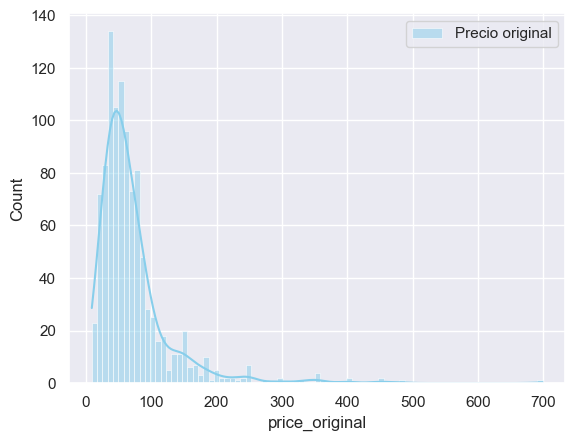

In [235]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df_alquileres, x="price_original", color="skyblue", label="Precio original", kde=True)

plt.legend() 
plt.show()

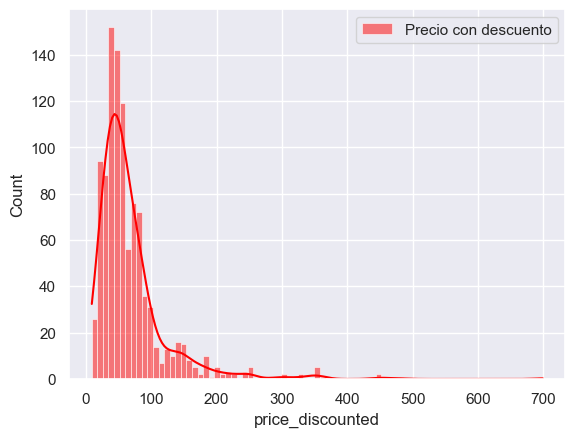

In [236]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df_alquileres, x="price_discounted", color="red", label="Precio con descuento", kde=True)
plt.legend() 
plt.show()

* ¿Observa alguna diferencia?

Observamos que la proporcion de los precios es similar, lo que hay de diferente entre los precios originales y los que tienen descuento es que el maximo es diferente. Lo cual es logico.

**<h1>5. Discretización de precios</h1>**

In [237]:
df_alquileres['price_original'].describe()

count       1028.0
mean     71.090467
std      58.885053
min            9.0
25%           39.0
50%           56.0
75%           80.0
max          699.0
Name: price_original, dtype: Float64

En base a lo observado, tomamo como ancho un bin de 250

In [238]:
df_alquileres['price_category']=np.where(
    df_alquileres['price_original']<250,'bajo',np.where(
        ((df_alquileres['price_original']>=250) & (df_alquileres['price_original']<500)),'medio','alto'
    )
)

In [239]:
df_alquileres['price_category'].unique()
df_alquileres['price_category'] = df_alquileres['price_category'].astype('category')

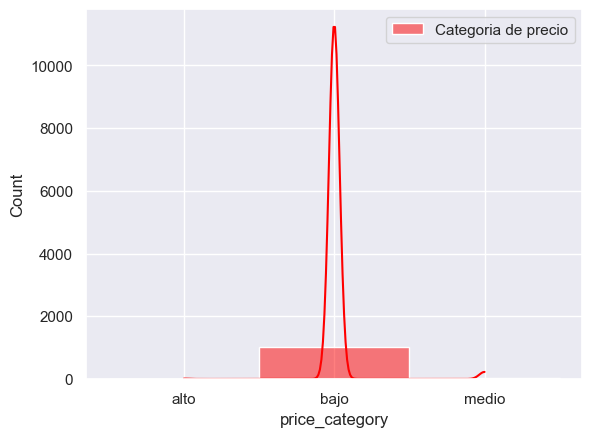

In [240]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df_alquileres, x="price_category", color="red", label="Categoria de precio", kde=True)
plt.legend() 
plt.show()

<Axes: xlabel='price_category', ylabel='price_original'>

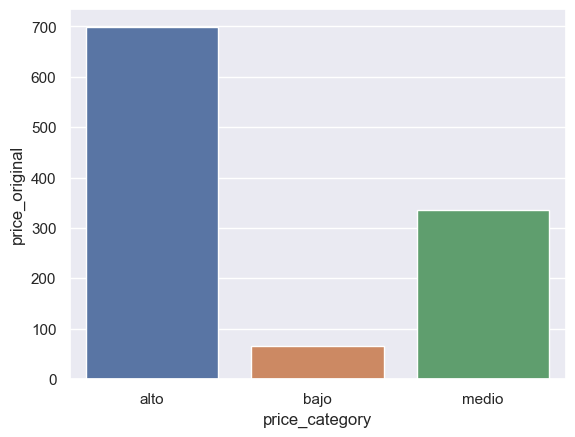

In [241]:
sns.barplot(x="price_category", y="price_original", hue="price_category", data=df_alquileres, errorbar=None)

**<h1>6. Análisis por provincia</h1>**

* ¿Cuántos alquileres con descuento hay por provincia?

In [242]:
# Cantidad de alquileres con descuentos por provincia
mask = df_alquileres['discounted']
df_alquileres[mask].groupby(by='provincia', observed=True).agg(
    cant_alquileres_con_descuento=('discounted', 'sum')
).reset_index().sort_values(by='cant_alquileres_con_descuento', ascending = False)

provincia  cant_alquileres_con_descuento
3  TIERRA DEL FUEGO                             63
2         RIO NEGRO                             46
0            CHUBUT                             45
1           NEUQUEN                             37

* De cada provincia: ¿Cuál es el alquiler más caro? ¿Y el más barato?.

In [243]:
# Alquiler mas barato y mas caro de cada localidad
df_alquileres.groupby(by='provincia', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')
    
).reset_index().sort_values(by='alquiler_mas_caro', ascending=False)

provincia  alquiler_mas_caro  alquiler_mas_barato
2         RIO NEGRO                699                   20
3  TIERRA DEL FUEGO                480                   12
0            CHUBUT                350                   10
1           NEUQUEN                220                    9

* ¿Qué provincia tiene más publicaciones con descuento?

In [244]:
# Cantidad de alquileres con descuentos por provincia
mask = df_alquileres['discounted']
df_alquileres[mask].groupby(by='provincia', observed=True).agg(
    cant_publicaciones_con_descuento=('discounted', 'sum')
).reset_index().sort_values(by='cant_publicaciones_con_descuento', ascending=False).head(1)

provincia  cant_publicaciones_con_descuento
3  TIERRA DEL FUEGO                                63

*  ¿En qué ciudad se encuentra el precio más caro? ¿Y el más barato?

In [245]:
df_alquileres.groupby(by='city', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')

).reset_index().sort_values(by='alquiler_mas_caro', ascending=False).head(1)

city  alquiler_mas_caro  alquiler_mas_barato
3  BARILOCHE                699                   21

In [246]:
df_alquileres.groupby(by='city', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')

).reset_index().sort_values(by='alquiler_mas_barato', ascending=True).head(2)

city  alquiler_mas_caro  alquiler_mas_barato
43  NEUQUEN CAPITAL                220                    9
14       CIPOLLETTI                180                    9

* Por último, realice 2 gráficos de cajas (boxplots) mostrando en uno la distribución de
* precios originales por provincia, y en otro la distribución de ratings por provincia

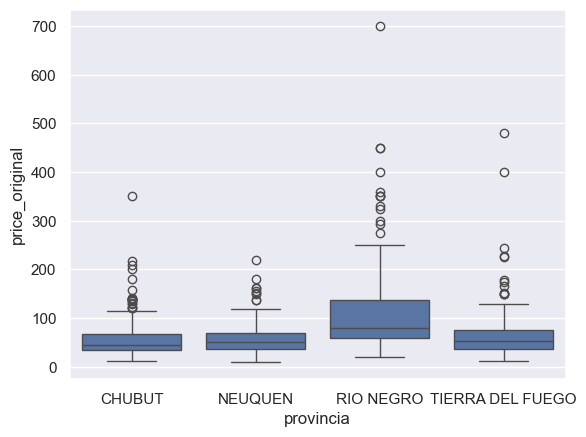

In [247]:
box_precios_originales = sns.boxplot(y='price_original', x='provincia', data=df_alquileres)

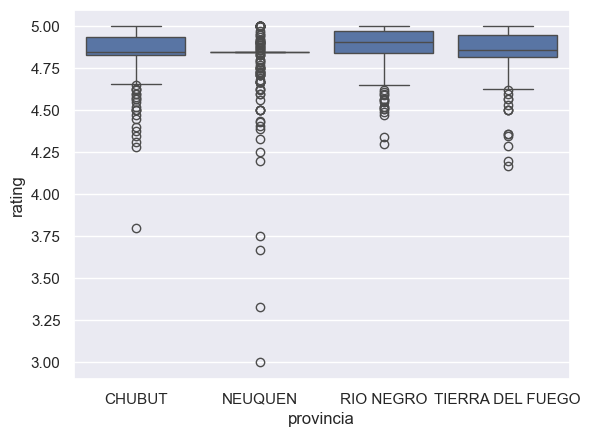

In [248]:
box_ratings = sns.boxplot(y='rating', x='provincia', data=df_alquileres)

**<h1>7. Características del alojamiento</h1>**

* Grafico de barras para baños

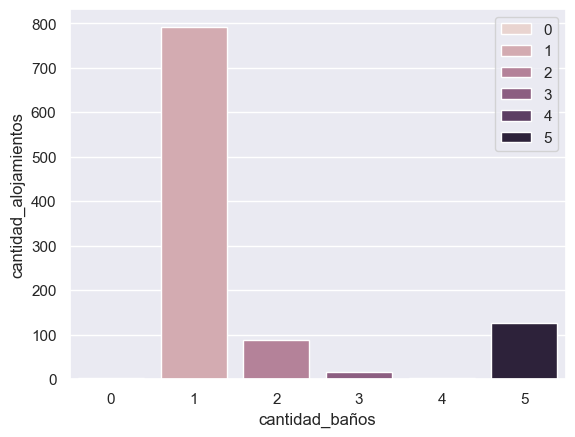

In [249]:
df_baños= df_alquileres.groupby('baño').agg(
    cantidad_alojamientos=('id_alojamiento','count')
).reset_index()
df_baños.rename(columns={'baño':'cantidad_baños'},inplace=True)


sns.set_theme(style="darkgrid")
sns.barplot(data=df_baños, x="cantidad_baños",y='cantidad_alojamientos',hue='cantidad_baños',  errorbar=None)

plt.legend()
plt.show()

* Grafico de barras para dormitorios

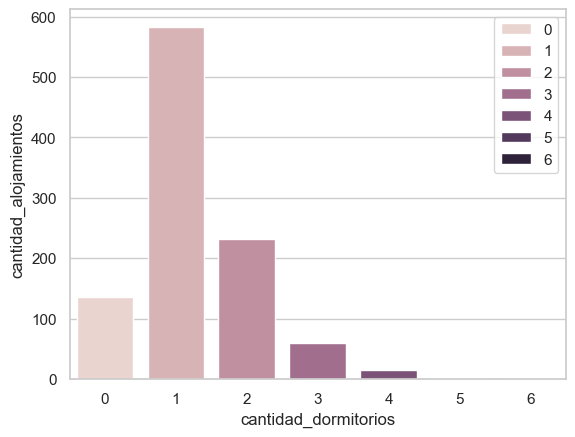

In [250]:
df_dormitorios = df_alquileres.groupby('dormitorio').agg(
    cantidad_alojamientos=('id_alojamiento', 'count')
).reset_index()
df_dormitorios.rename(columns={'dormitorio': 'cantidad_dormitorios'}, inplace=True)
df_dormitorios['cantidad_dormitorios'] = df_dormitorios['cantidad_dormitorios'].astype('int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_dormitorios, x="cantidad_dormitorios",
            y='cantidad_alojamientos', hue='cantidad_dormitorios',  errorbar=None)

plt.legend()
plt.show()

* Grafico de barras para camas

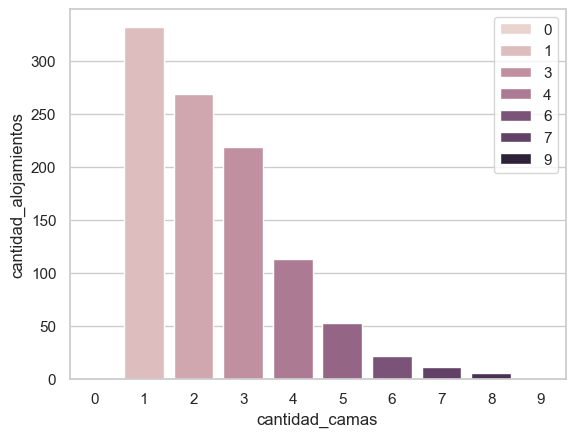

In [251]:
df_camas = df_alquileres.groupby('cama').agg(
    cantidad_alojamientos=('id_alojamiento', 'count')
).reset_index()
df_camas.rename(
    columns={'cama': 'cantidad_camas'}, inplace=True)
df_camas['cantidad_camas'] = df_camas['cantidad_camas'].astype(
    'int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_camas, x="cantidad_camas",
            y='cantidad_alojamientos', hue='cantidad_camas',  errorbar=None)

plt.legend()
plt.show()

**<h1>8. Detección de outliers</h1>**

In [252]:
def estandarizar_var(X):
  promedio = np.mean(X)
  desvio = np.std(X)
  X_estandarizada = (X-promedio)/desvio
  return X_estandarizada

In [253]:
# Edad
df_alquileres['price_standarized'] = estandarizar_var(df_alquileres['price_original'])

In [254]:
# Función para detectar outliers
def detectar_outliers(df_estandarizado, valor_limite,referencia, variable):
  outliers = df_estandarizado.loc[np.abs(
      df_alquileres[variable]) > valor_limite, [referencia,variable]]
  return   outliers


In [255]:
# Detectamos jugadores que destaquen en rebotes
detectar_outliers(df_alquileres, 3,'provincia', 'price_standarized').groupby(by='provincia',observed=True).agg(
    price_standarized_outlier=('price_standarized','max')
).reset_index().sort_values(by='price_standarized_outlier', ascending=False)

provincia  price_standarized_outlier
1         RIO NEGRO                    10.6685
2  TIERRA DEL FUEGO                   6.947579
0            CHUBUT                   4.738814

In [256]:
# Detectamos outliers
detectar_outliers(df_alquileres, 3,'price_category', 'price_standarized').groupby(by='price_category', observed=True).agg(
    cant_price_standarized_outlier=('price_standarized', 'count')
).reset_index().sort_values(by='cant_price_standarized_outlier', ascending=False)

price_category  cant_price_standarized_outlier
1          medio                              20
0           alto                               1

<Axes: xlabel='price_category', ylabel='cant_price_standarized_outlier'>

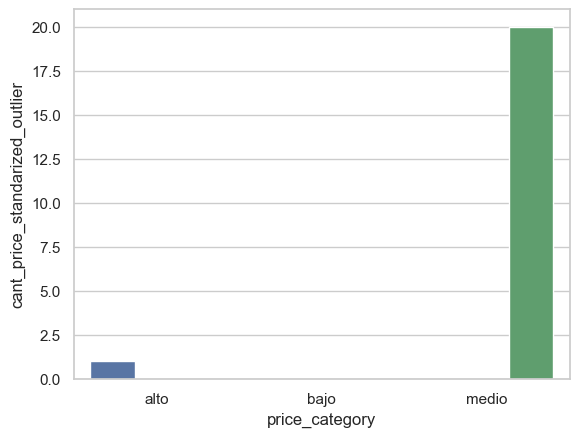

In [257]:
df_out_cat = detectar_outliers(df_alquileres, 3, 'price_category', 'price_standarized').groupby(by='price_category', observed=True).agg(
    cant_price_standarized_outlier=('price_standarized', 'count')
).reset_index().sort_values(by='cant_price_standarized_outlier', ascending=False)

sns.barplot(x="price_category", y="cant_price_standarized_outlier",
            hue="price_category", data=df_out_cat, errorbar=None)

Segun los datos, hay mayor cantidad de outliers en "medio". Y algunos pocos en alto. Cuando en primera instancia se podria haber persando que estarian en "bajos" o "altos".

In [258]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_alojamiento     1028 non-null   int64         
 1   name               1028 non-null   object        
 2   category           1028 non-null   category      
 3   rating             1028 non-null   float64       
 4   city               1024 non-null   category      
 5   latitude           1028 non-null   float64       
 6   longitude          1028 non-null   float64       
 7   characteristics    1028 non-null   object        
 8   check_in           1028 non-null   datetime64[ns]
 9   check_out          1028 non-null   datetime64[ns]
 10  price_discounted   1028 non-null   Int64         
 11  price_original     1028 non-null   Int64         
 12  price_qualifier    1028 non-null   category      
 13  cant_resultados    1028 non-null   int64         
 14  fecha_sc

**<h1>9. Análisis estacional y de duración</h1>**

* Analizar si existe una variación estacional en los precios agrupando por mes de check_in.
* Mostrar esta variación en un gráfico de barras. Considerando la región de la Argentina de
* donde se tomaron los datos, ¿le parece que tienen sentido esos resultados?

In [259]:
# Agregamos una columna mes, basada en check_in
df_alquileres['mes'] = df_alquileres['check_in'].dt.month

In [260]:
df_mes=df_alquileres.groupby(by='mes').agg(
    promedio_precios_por_mes=('price_discounted','mean')
)
pd.options.display.float_format = '{:,.2f}'.format
df_mes.reset_index()

mes  promedio_precios_por_mes
0     1                     48.33
1     2                     65.00
2     3                     36.00
3     4                     45.00
4     5                     20.00
5     7                     64.27
6     8                     84.65
7     9                     93.41
8    10                     55.32
9    11                     53.00
10   12                     42.75

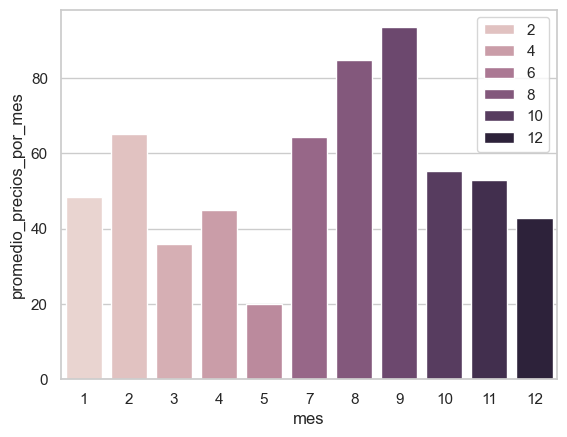

In [261]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df_mes, x="mes",
            y='promedio_precios_por_mes', hue='mes',  errorbar=None)

plt.legend()
plt.show()

* Estos resultados tienen sentido, porque serian los meses de mayo nieve. Sube el turismo

* Duración de las estancias. Calcular la duración de cada estancia utilizando las columnas
* check_in y check_out. Crear una nueva columna stay_duration que contenga la duración en días.
* ¿Existe alguna relación entre la duración de la estancia y el precio del alojamiento? 
* Graficar esta ambas variables en un scatter plot y comentar lo observado

In [262]:
# Dias de estadias
df_alquileres['stay_duration'] = (df_alquileres['check_out'] - df_alquileres['check_in']).dt.days

<Axes: xlabel='stay_duration', ylabel='price_discounted'>

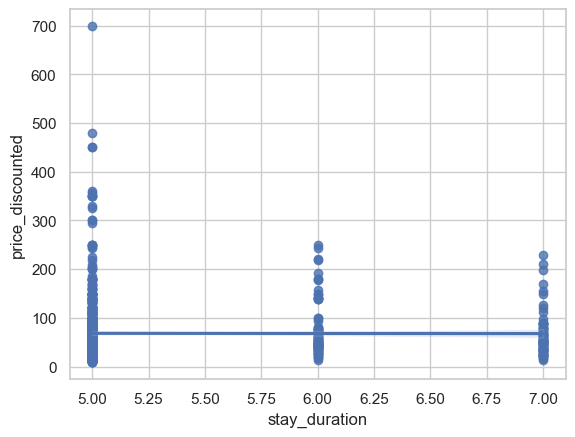

In [263]:
sns.regplot(data=df_alquileres[['stay_duration', 'price_discounted']],
            x="stay_duration", y="price_discounted", fit_reg=True)


* No pareciera haber una relacion directa.
* Lo que si vemos, que hay mas alojamientos para los 5 dias, con mucha variacion de precios a que si consideramos una estadia de 6 o 7.
* Se podria decir que a mayor estadia mayor estabilidad de precios y mas baratos en relacion a la estadia.

**10. Correlación entre precio y características</h1>**

* Habiendo creado las columnas bathrooms, bedroom y beds en el punto 7, agrupar el
* dataset por cada una de ellas, calcular el promedio de price_original y graficar cada una
* utilizando gráficos de barras 
* ¿Qué observan? 
* ¿Hay alguna tendencia? 
* ¿Siempre se cumple?

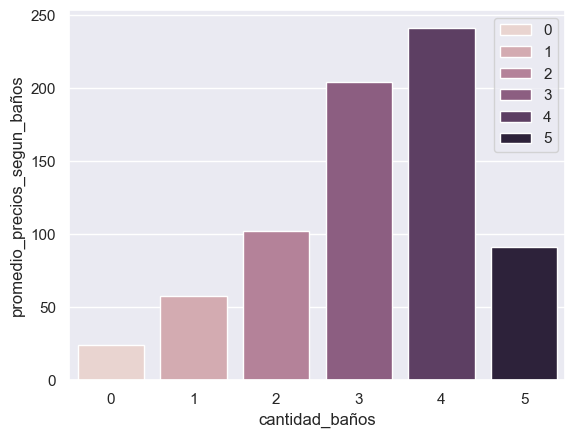

In [264]:
df_baños = df_alquileres.groupby(by='baño').agg(
    promedio_precios_segun_baños=('price_discounted', 'mean')
).reset_index()
pd.options.display.float_format = '{:,.2f}'.format



df_baños.rename(columns={'baño': 'cantidad_baños'}, inplace=True)


sns.set_theme(style="darkgrid")
sns.barplot(data=df_baños, x="cantidad_baños",
            y='promedio_precios_segun_baños', hue='cantidad_baños',  errorbar=None)

plt.legend()
plt.show()

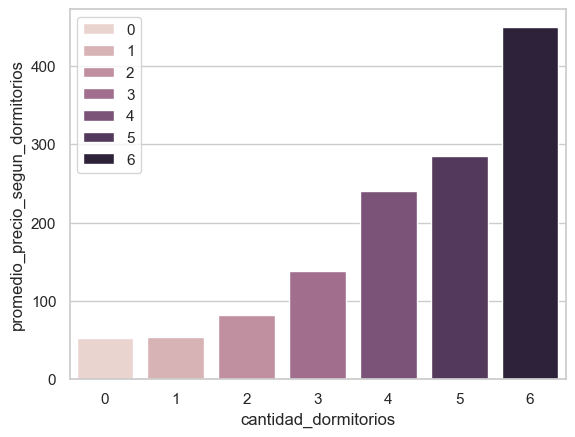

In [265]:
df_dormitorios = df_alquileres.groupby('dormitorio').agg(
    promedio_precio_segun_dormitorios=('price_discounted', 'mean')
).reset_index()
df_dormitorios.rename(
    columns={'dormitorio': 'cantidad_dormitorios'}, inplace=True)
df_dormitorios['cantidad_dormitorios'] = df_dormitorios['cantidad_dormitorios'].astype(
    'int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_dormitorios, x="cantidad_dormitorios",
            y='promedio_precio_segun_dormitorios', hue='cantidad_dormitorios',  errorbar=None)

plt.legend()
plt.show()

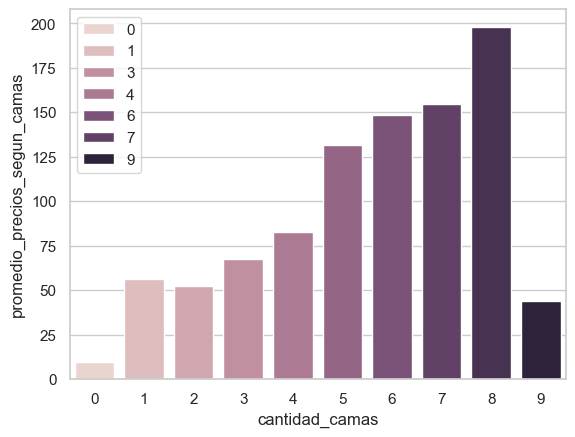

In [266]:
df_camas = df_alquileres.groupby('cama').agg(
    promedio_precios_segun_camas=('price_discounted', 'mean')
).reset_index()
df_camas.rename(
    columns={'cama': 'cantidad_camas'}, inplace=True)
df_camas['cantidad_camas'] = df_camas['cantidad_camas'].astype(
    'int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_camas, x="cantidad_camas",
            y='promedio_precios_segun_camas', hue='cantidad_camas',  errorbar=None)

plt.legend()
plt.show()

En general pareciera ser que:
+ A mas camas, mayor precio
+ A mas dormitorios, mayor precio
+ A mas baños, mayor precio
Pero llega un punto que ya no se cumple, espeialmente en camas y baños, esto podria indicar que:
+ En general, hay una cantidad de baños logicamente suficientes.
+ En general, se da que los grupos tienen un tamaño no muy grande que hasta cierta cantidad de camas es suficiente.
Por esto es que los precios, a partir de cierto numero de camas y baños no afectan tanto el precio a aumentar.

* Correlaciones

In [267]:
df_alquileres['baño'].corr(df_alquileres['price_original'])

0.25629996411637607

In [268]:
df_alquileres['dormitorio'].corr(df_alquileres['price_original'])

0.5067322332067398

In [269]:
df_alquileres['cama'].corr(df_alquileres['price_original'])

0.4002216427741159

* Pareciera ser que la que mas se asocia a la variabilidad del precio es la cantidad de dormitorios, luego seguiria la cantidad de camas y por ultimo podria ser la cantidad de baños.
